# **Walmart Store Prediction: Analyzing Sales Performance Metrics Across Different Store Locations**

## Objective

The primary goal of this project is to analyze and understand how sales performance metrics vary across different Walmart store locations. By examining these variations, we aim to identify patterns, trends, and potential areas for improvement in sales strategies.

## Visualization Components

### 1. Graph 1: Sales Across All Stores and Departments
This graph will provide a comprehensive view of total sales across all Walmart stores and their respective departments. It will help in understanding the overall performance and contribution of each department to the total sales.

### 2. Graph 2: Sales Across Different Stores
This graph will focus on the sales performance of different Walmart stores. For manageability, it will display sales data from Store 1 to Store 10 only.

Additionally, this graph will include:
- **Sales Across Different Departments**: Highlighting the sales figures for various departments within these stores.
- **Sales Across Different Store Types**: Comparing sales performance based on the type of store.
- **Box Plot of Store Types**: Providing a visual summary of the sales distribution across different types of stores, illustrating the spread and central tendency of sales data.

By using these visualizations, we aim to gain insights into sales dynamics across various locations and departments, which can inform decision-making and strategic planning for improving sales performance.


In [ ]:
import pandas as pd
import numpy as np

link_url = "https://raw.githubusercontent.com/PhD1202/Walmart-Sales-Analytics/main/merged_data.csv"
data_date = pd.read_csv(link_url)
data_date.drop(data_date.columns[0], axis=1, inplace=True)
data_date.head()

# Assuming data_date is your DataFrame with columns "Date" and "Weekly_Sales"
# Assuming "Date" column is not in datetime format yet

# Convert "Date" column to datetime format
data_date["Date"] = pd.to_datetime(data_date["Date"])

# Set "Date" column as index
data_date.set_index("Date", inplace=True)

df = data_date.copy()
df.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Type,Size,Dept,Weekly_Sales,IsHoliday_y
Date,,,,,,,,,,,,,,,,
2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50,False
2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27,False
2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12,False
2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04,False
2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38,False


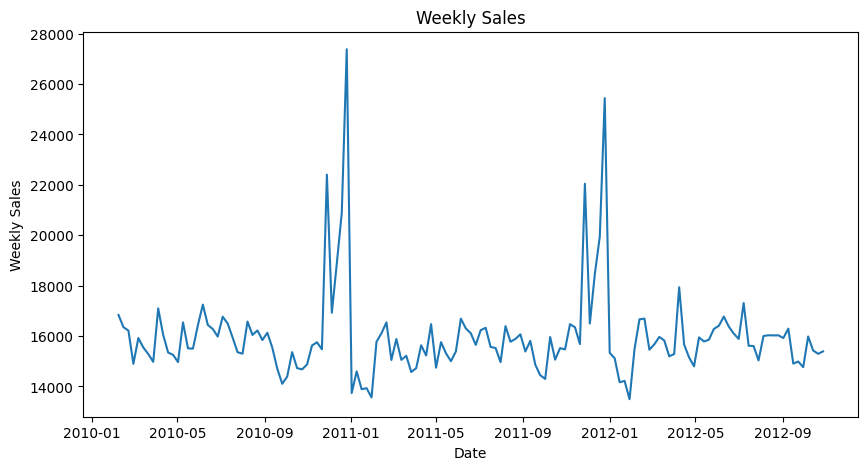

In [ ]:

import matplotlib.pyplot as plt

df_grouped_week = df["Weekly_Sales"].resample("W").mean( )

plt.figure(figsize = (10, 5))
plt.plot(df_grouped_week)
plt.title("Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()

In [ ]:
df_grouped_week


Date
2010-02-07    49750740.50
2010-02-14    48336677.63
2010-02-21    48276993.78
2010-02-28    43968571.13
2010-03-07    46871470.30
                 ...     
2012-09-30    43734899.40
2012-10-07    47566639.31
2012-10-14    46128514.25
2012-10-21    45122410.57
2012-10-28    45544116.29
Freq: W-SUN, Name: Weekly_Sales, Length: 143, dtype: float64

In [ ]:
# Get the lowest profit for store

top_5_profit = df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False)[:5]
top_5_lowest_profit = df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=True)[:5]

In [ ]:
top_5_profit.index

Index([20, 4, 14, 13, 2], dtype='int64', name='Store')

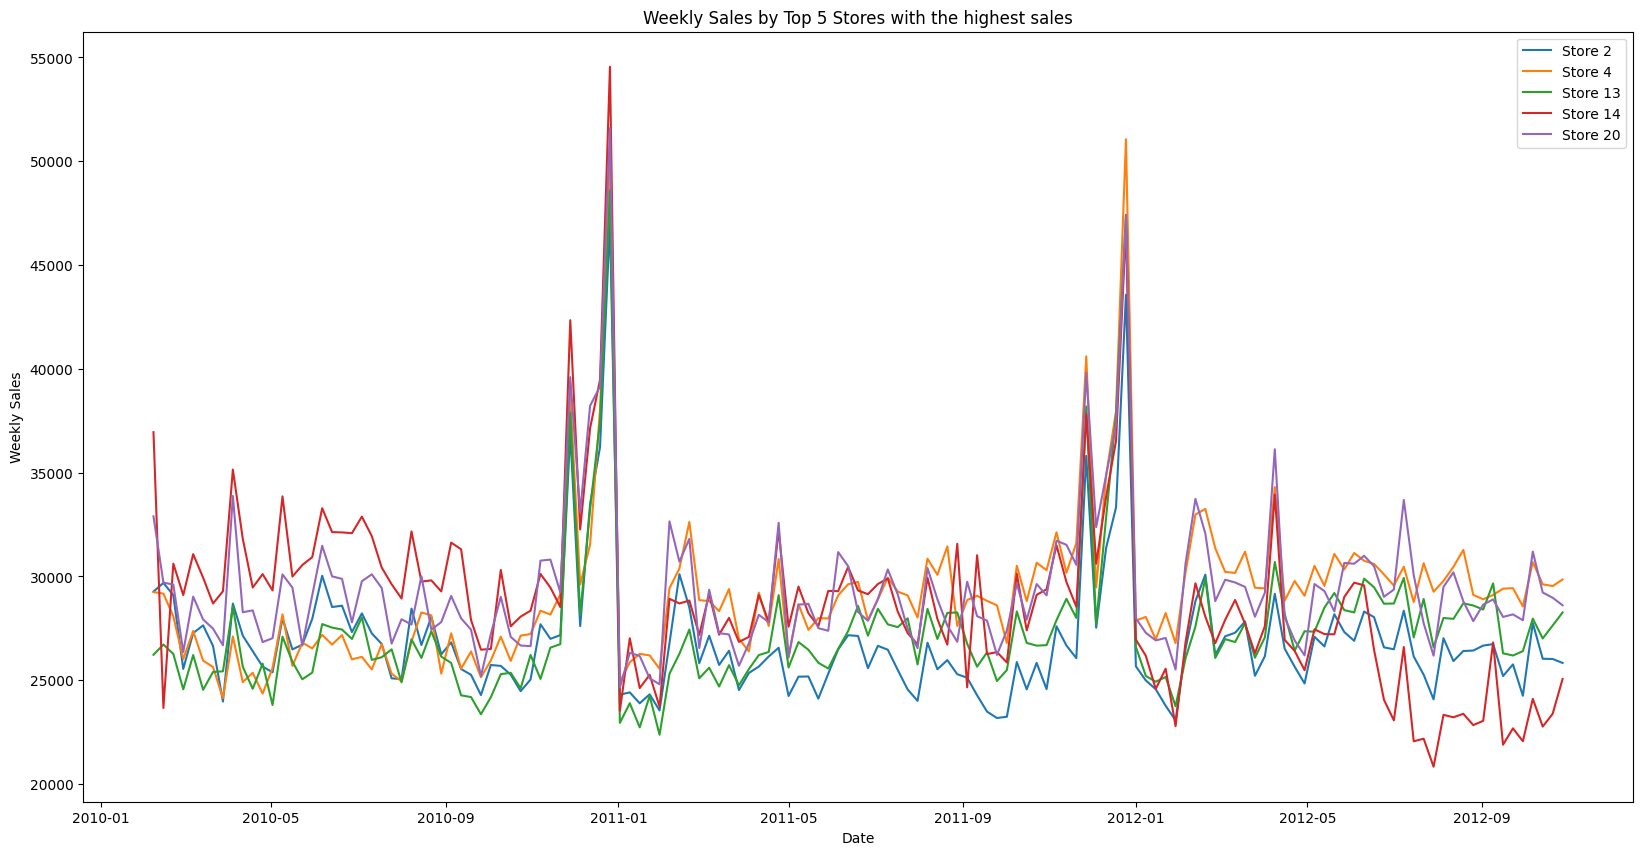

In [ ]:
import matplotlib.pyplot as plt
# Group the DataFrame by store and resample weekly
df_grouped_week = df.groupby(["Store"]).resample("W")["Weekly_Sales"].mean()

# Get unique store IDs
stores = df["Store"].unique()



plt.figure(figsize=(20, 10))

# Loop through each store
for store in stores:
    if store in top_5_profit.index:
      # Filter data for the current store
      store_data = df_grouped_week[df_grouped_week.index.get_level_values("Store") == store]

      # Plot weekly sales for the current store
      plt.plot(store_data.index.get_level_values("Date"), store_data.values, label=f"Store {store}")

plt.title("Weekly Sales by Top 5 Stores with the highest sales")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


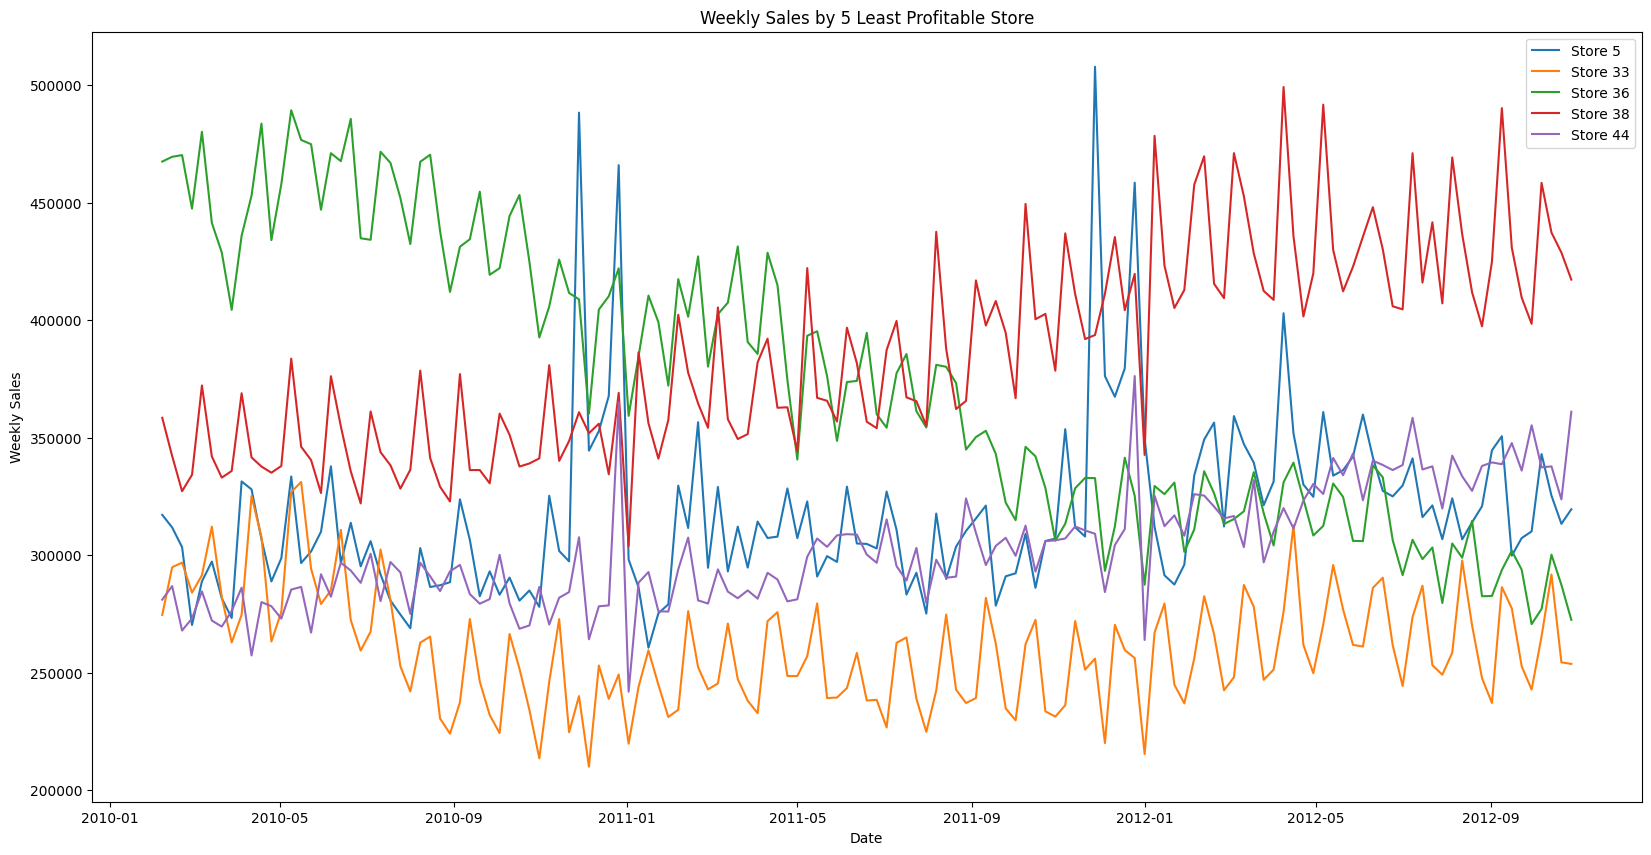

In [ ]:
import matplotlib.pyplot as plt
# Group the DataFrame by store and resample weekly
df_grouped_week = df.groupby(["Store"]).resample("W")["Weekly_Sales"].sum()

# Get unique store IDs
stores = df["Store"].unique()



plt.figure(figsize=(20, 10))

# Loop through each store
for store in stores:
    if store in top_5_lowest_profit.index:
      # Filter data for the current store
      store_data = df_grouped_week[df_grouped_week.index.get_level_values("Store") == store]

      # Plot weekly sales for the current store
      plt.plot(store_data.index.get_level_values("Date"), store_data.values, label=f"Store {store}")

plt.title("Weekly Sales by 5 Least Profitable Store")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


In [ ]:
df_grouped_week

Store  Date      
1      2010-02-07    1643690.90
       2010-02-14    1641957.44
       2010-02-21    1611968.17
       2010-02-28    1409727.59
       2010-03-07    1554806.68
                        ...    
45     2012-09-30     713173.95
       2012-10-07     733455.07
       2012-10-14     734464.36
       2012-10-21     718125.53
       2012-10-28     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

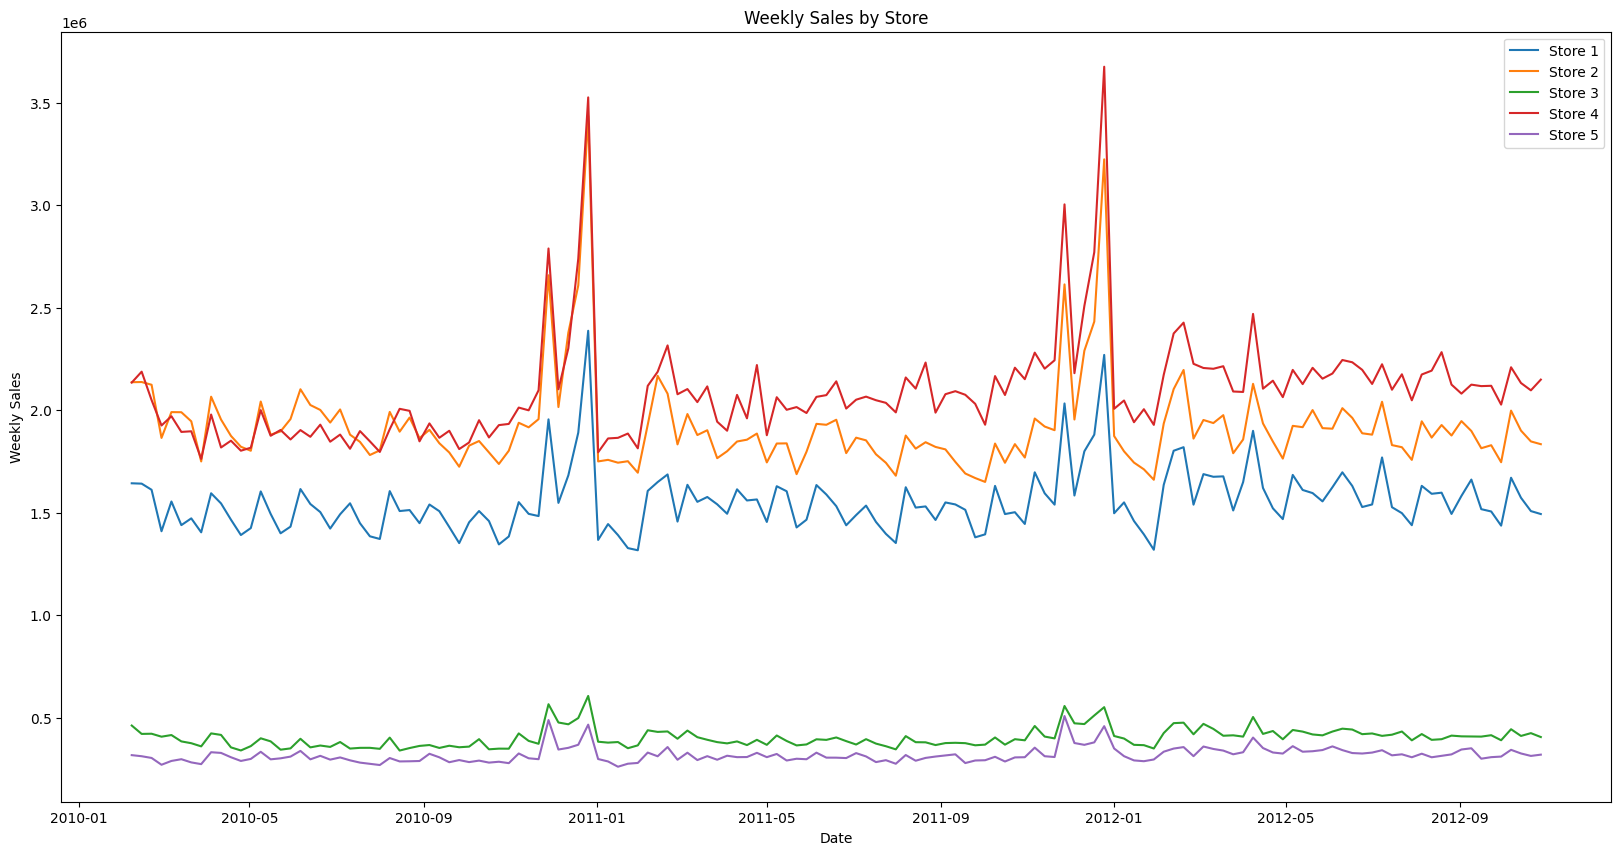

In [ ]:
import matplotlib.pyplot as plt
# Group the DataFrame by store and resample weekly
df_grouped_week = df.groupby(["Store", pd.Grouper(level='Date', freq='W')])["Weekly_Sales"].sum()

# Get unique store IDs
stores = df["Store"].unique()

plt.figure(figsize=(20, 10))

# Loop through each store
for store in stores[:5]:
    # Filter data for the current store
    store_data = df_grouped_week[df_grouped_week.index.get_level_values("Store") == store]

    # Plot weekly sales for the current store
    plt.plot(store_data.index.get_level_values("Date"), store_data.values, label=f"Store {store}")

plt.title("Weekly Sales by Store")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


First 5 stores

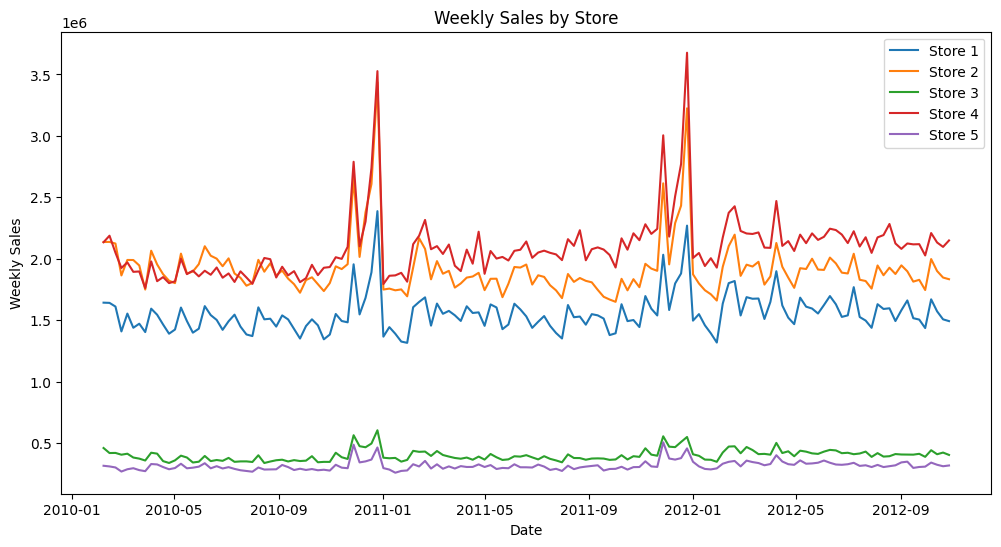

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_grouped_week is already calculated as you mentioned

# Get unique store IDs
stores = df["Store"].unique()

plt.figure(figsize=(12, 6))


max_stores_val = {}

# Loop through each store
for store in stores[:5]:
    # Filter data for the current store
    store_data = df_grouped_week[df_grouped_week.index.get_level_values("Store") == store]


    max_stores_val[store] = store_data.values.sum()
    # Plot weekly sales for the current store
    plt.plot(store_data.index.get_level_values("Date"), store_data.values, label=f"Store {store}")

plt.title("Weekly Sales by Store")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


In [ ]:

max_5_stores = sorted(max_stores_val.items(), key=lambda x: x[1], reverse=True)[:5]

In [ ]:
keys = []
for n in max_5_stores:

  keys.append(n[0])

keys

[4, 2, 1, 3, 5]

Top 5 stores

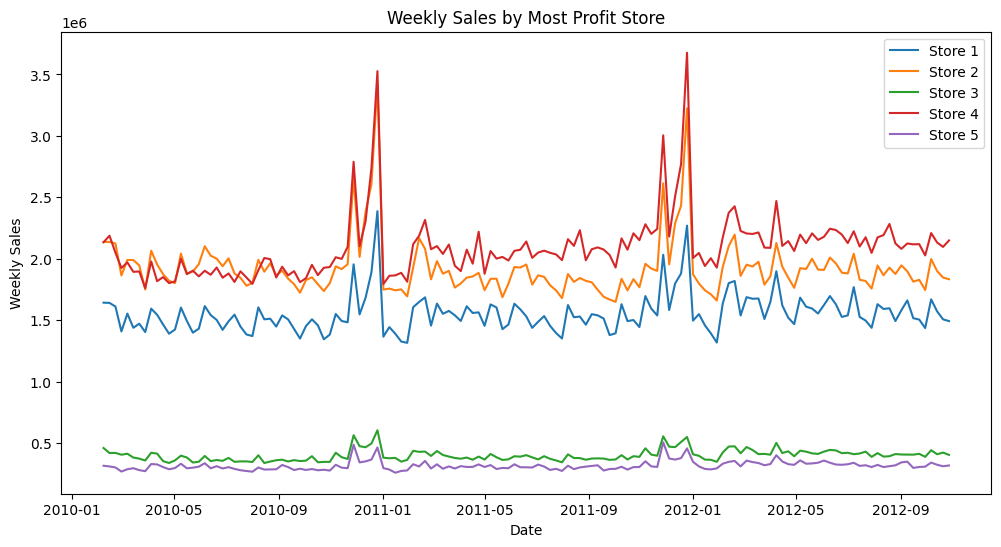

In [ ]:
# [(20, 301397792.46000004),
#  (4, 299543953.38),
#  (14, 288999911.34000003),
#  (13, 286517703.8),
#  (2, 275382440.97999996)]

import matplotlib.pyplot as plt

# Assuming df_grouped_week is already calculated as you mentioned

# Get unique store IDs
stores = df["Store"].unique()

plt.figure(figsize=(12, 6))


max_stores_val = {}

# Loop through each store
for store in stores:
    if store in keys:
      # Filter data for the current store
      store_data = df_grouped_week[df_grouped_week.index.get_level_values("Store") == store]


      max_stores_val[store] = store_data.values.sum()
      # Plot weekly sales for the current store
      plt.plot(store_data.index.get_level_values("Date"), store_data.values, label=f"Store {store}")

plt.title("Weekly Sales by Most Profit Store")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


Group by Dept

In [ ]:

df_grouped_week = df["Weekly_Sales"].resample("W").sum( )


In [ ]:
df_grouped_week

Date
2010-02-07    49750740.50
2010-02-14    48336677.63
2010-02-21    48276993.78
2010-02-28    43968571.13
2010-03-07    46871470.30
                 ...     
2012-09-30    43734899.40
2012-10-07    47566639.31
2012-10-14    46128514.25
2012-10-21    45122410.57
2012-10-28    45544116.29
Freq: W-SUN, Name: Weekly_Sales, Length: 143, dtype: float64

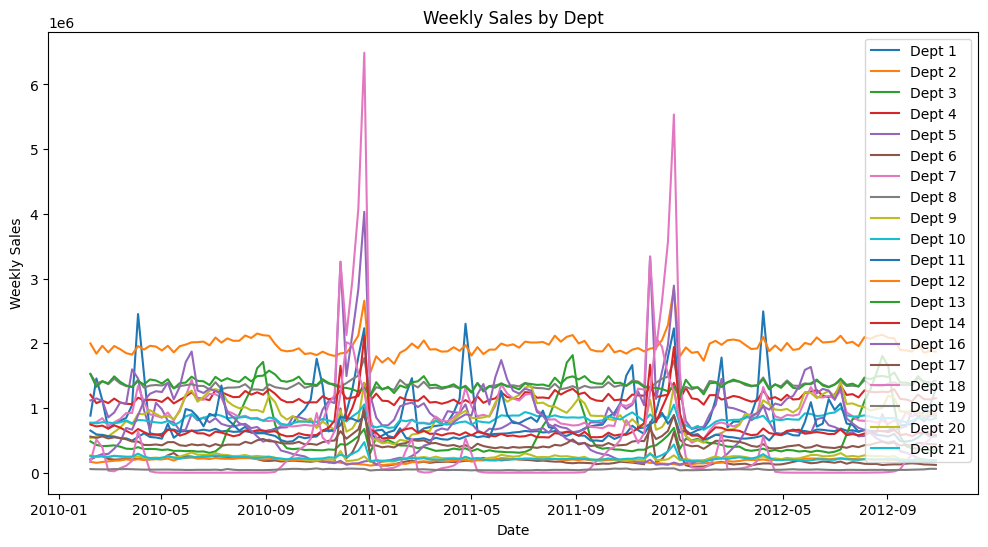

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_grouped_week is already calculated as you mentioned
# Group the DataFrame by store and resample weekly
df_grouped_week = df.groupby("Dept")["Weekly_Sales"].resample("W").sum()

# Get unique store IDs
department = df["Dept"].unique()

plt.figure(figsize=(12, 6))


max_dept_val = {}

# Loop through each store
for dept in department[:20]:
    # Filter data for the current store
    dept_data = df_grouped_week[df_grouped_week.index.get_level_values("Dept") == dept]


    max_dept_val[dept] = dept_data.values.sum()
    # Plot weekly sales for the current store
    plt.plot(dept_data.index.get_level_values("Date"), dept_data.values, label=f"Dept {dept}")

plt.title("Weekly Sales by Dept")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


In [ ]:
top_5_profit_dept = df.groupby("Dept")["Weekly_Sales"].sum().sort_values(ascending = False)[:5]
top_5_least_profit_dept = df.groupby("Dept")["Weekly_Sales"].sum().sort_values(ascending = True)[:5]

In [ ]:
top_5_least_profit_dept

Dept
47    -4962.93
43       14.32
39      177.98
78     1714.71
51    30572.83
Name: Weekly_Sales, dtype: float64

In [ ]:
df["Weekly_Sales"].describe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

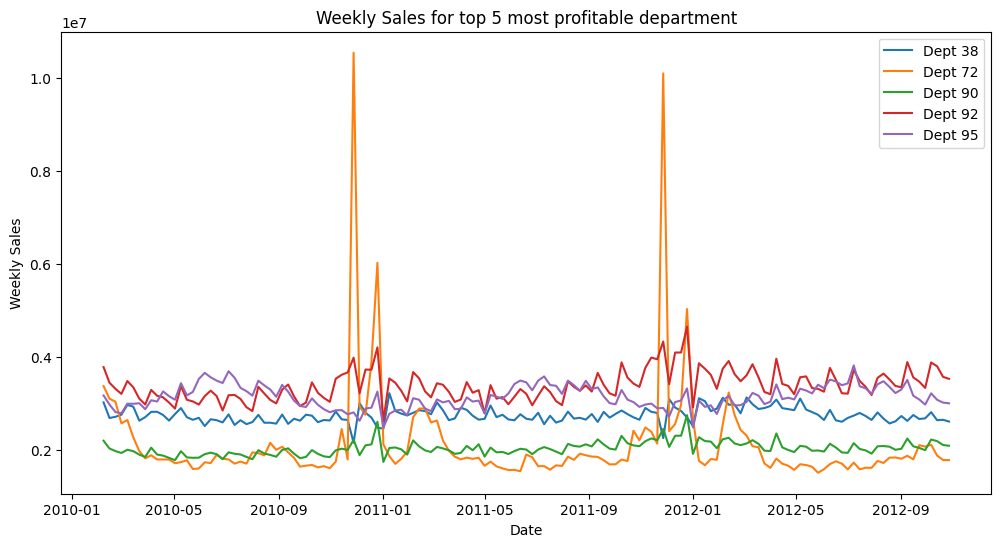

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_grouped_week is already calculated as you mentioned
# Group the DataFrame by store and resample weekly
df_grouped_week = df.groupby("Dept")["Weekly_Sales"].resample("W").sum()

# Get unique store IDs
department = df["Dept"].unique()

plt.figure(figsize=(12, 6))


max_dept_val = {}

# Loop through each dept
for dept in department:

    if dept in top_5_profit_dept.index:
      # Filter data for the current dept
      dept_data = df_grouped_week[df_grouped_week.index.get_level_values("Dept") == dept]


      max_dept_val[dept] = dept_data.values.sum()
      # Plot weekly sales for the current dept
      plt.plot(dept_data.index.get_level_values("Date"), dept_data.values, label=f"Dept {dept}")

plt.title("Weekly Sales for top 5 most profitable department")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


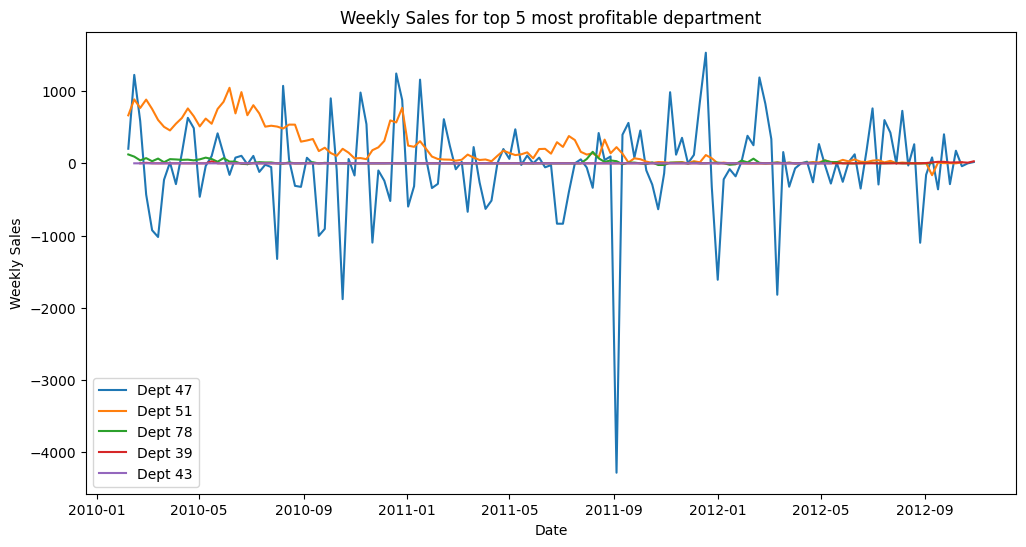

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_grouped_week is already calculated as you mentioned
# Group the DataFrame by store and resample weekly
df_grouped_week = df.groupby("Dept")["Weekly_Sales"].resample("W").sum()

# Get unique store IDs
department = df["Dept"].unique()

plt.figure(figsize=(12, 6))


max_dept_val = {}

# Loop through each dept
for dept in department:

    if dept in top_5_least_profit_dept.index:
      # Filter data for the current dept
      dept_data = df_grouped_week[df_grouped_week.index.get_level_values("Dept") == dept]


      max_dept_val[dept] = dept_data.values.sum()
      # Plot weekly sales for the current dept
      plt.plot(dept_data.index.get_level_values("Date"), dept_data.values, label=f"Dept {dept}")

plt.title("Weekly Sales for top 5 least profitable department")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


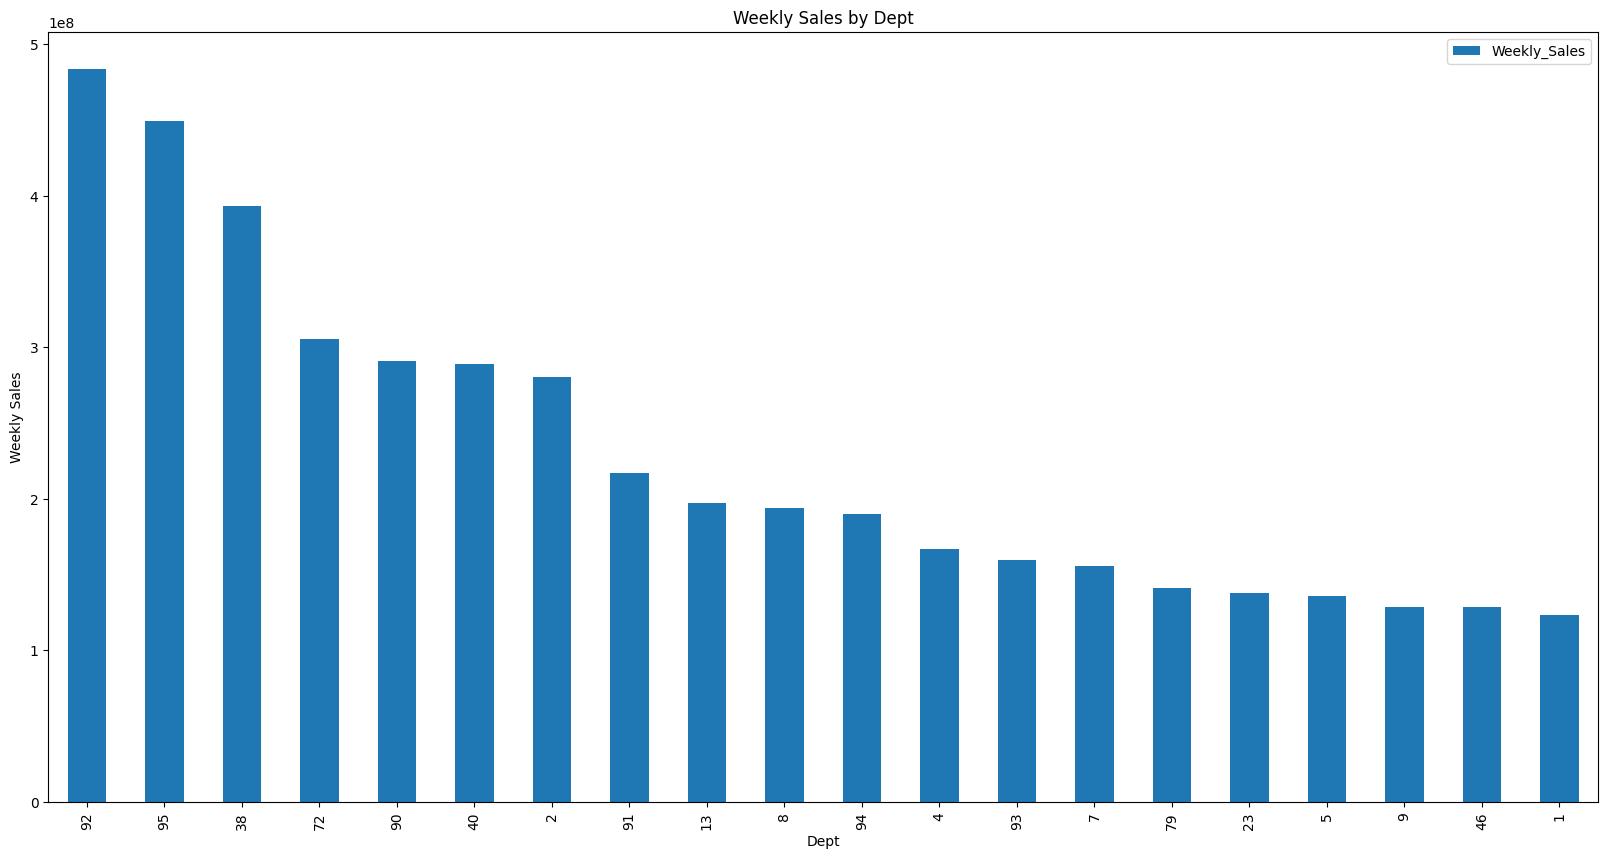

In [ ]:
# Plot a bar chart of each department and their sales


df_grouped_week = df.groupby("Dept").sum()
df_grouped_week = df_grouped_week.sort_values(by = "Weekly_Sales", ascending  = False)
df_grouped_week["Weekly_Sales"][:20].plot(kind = "bar", figsize = (20, 10))
plt.title("Weekly Sales by Dept")
plt.xlabel("Dept")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


In [ ]:
df_grouped_week = df.groupby("Dept")["Weekly_Sales"].mean()
pd.DataFrame(df_grouped_week)

,Weekly_Sales
Dept,
1,19213.485088
2,43607.020113
3,11793.698516
4,25974.630238
5,21365.583515
...,...
95,69824.423080
96,15210.942761
97,14255.576919


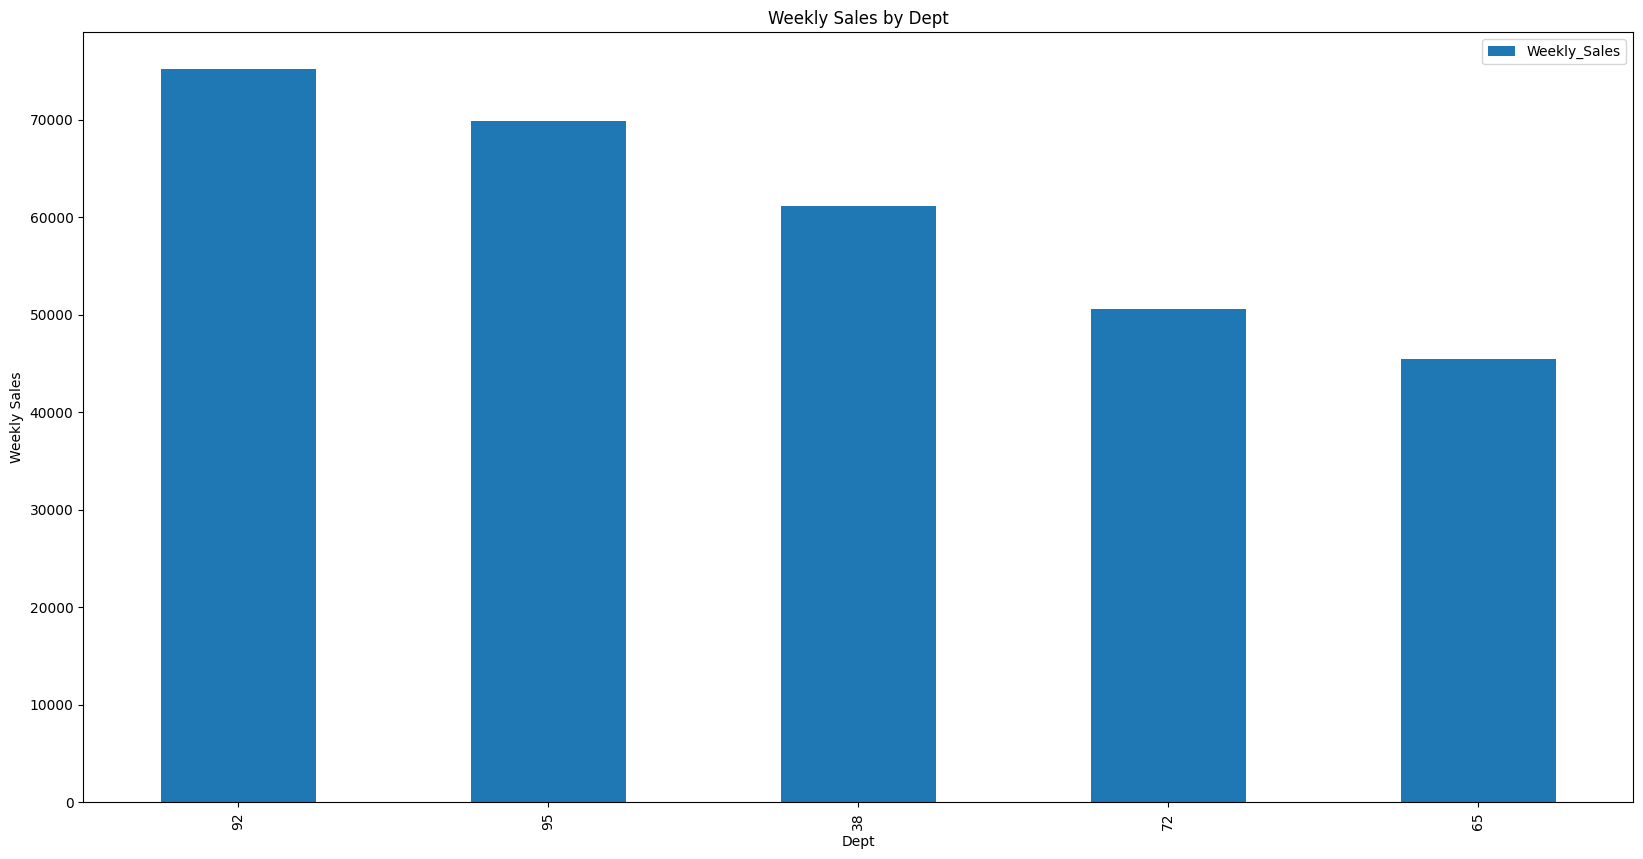

In [ ]:
# Plot a bar chart of each department and their sales
df_grouped_week = df.groupby("Dept")["Weekly_Sales"].mean()
df_grouped_week = pd.DataFrame(df_grouped_week)

df_grouped_week = df_grouped_week.sort_values(by = "Weekly_Sales", ascending  = False)
df_grouped_week["Weekly_Sales"][:5].plot(kind = "bar", figsize = (20, 10))
plt.title("Weekly Sales by Dept")
plt.xlabel("Dept")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


Dept 92, 95, 38, 72, and 90 at Walmart have the highest sales.

92	Grocery
95	DSD Grocery
38	Pharmacy Rx
72	Electronics
90	Dairy



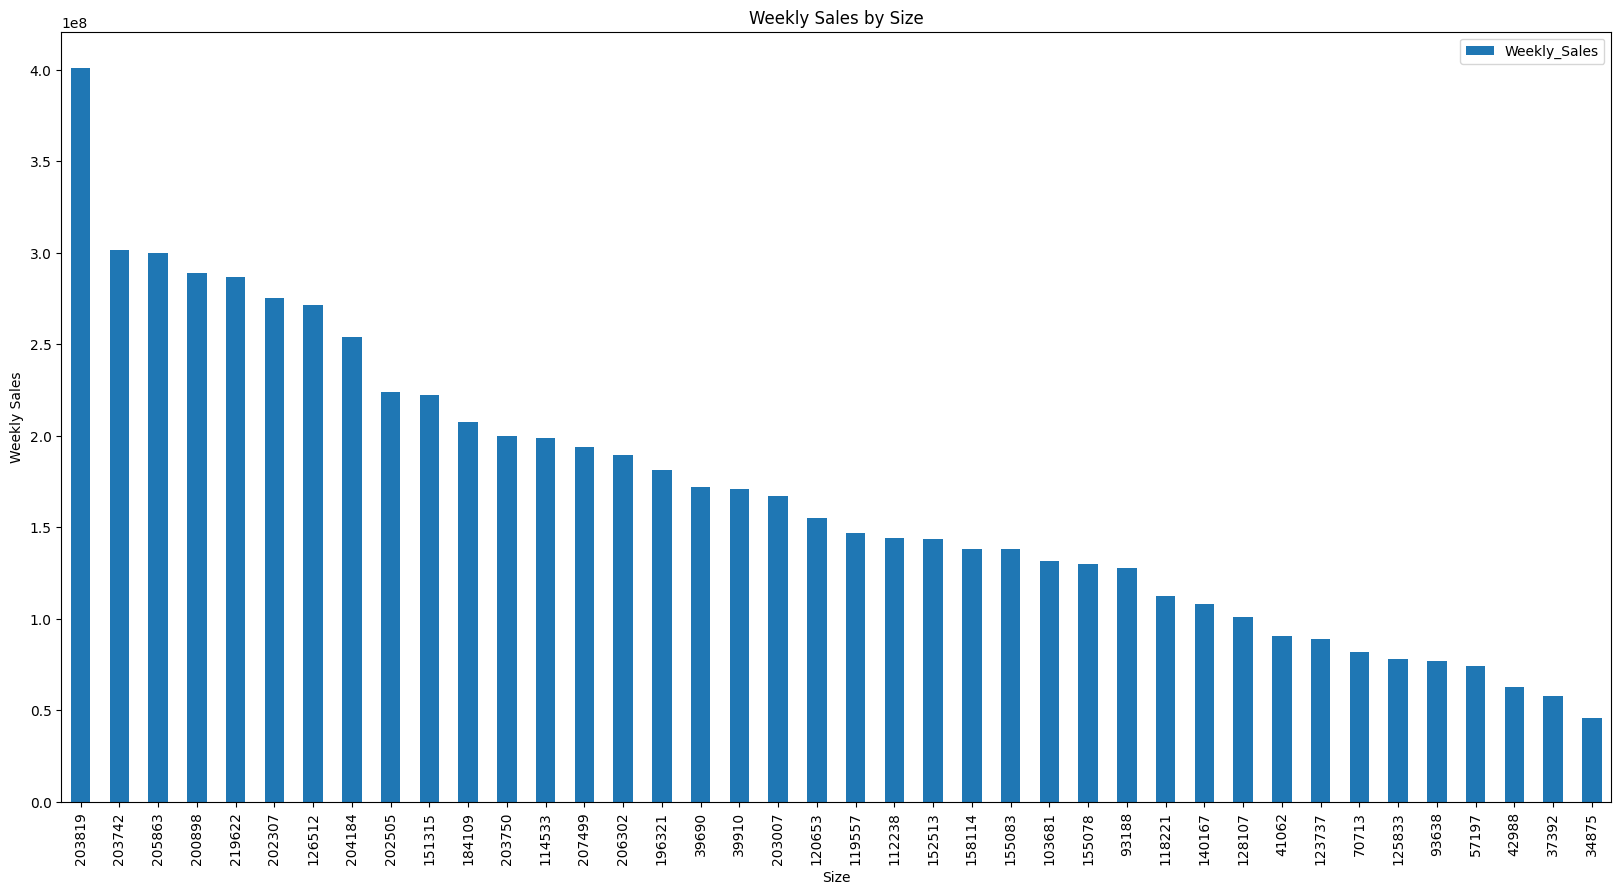

In [ ]:
df_size = df.groupby("Size")["Weekly_Sales"].sum().sort_values(ascending = False)

df_size.plot(kind = "bar", figsize = (20, 10))
plt.title("Weekly Sales by Size")
plt.xlabel("Size")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

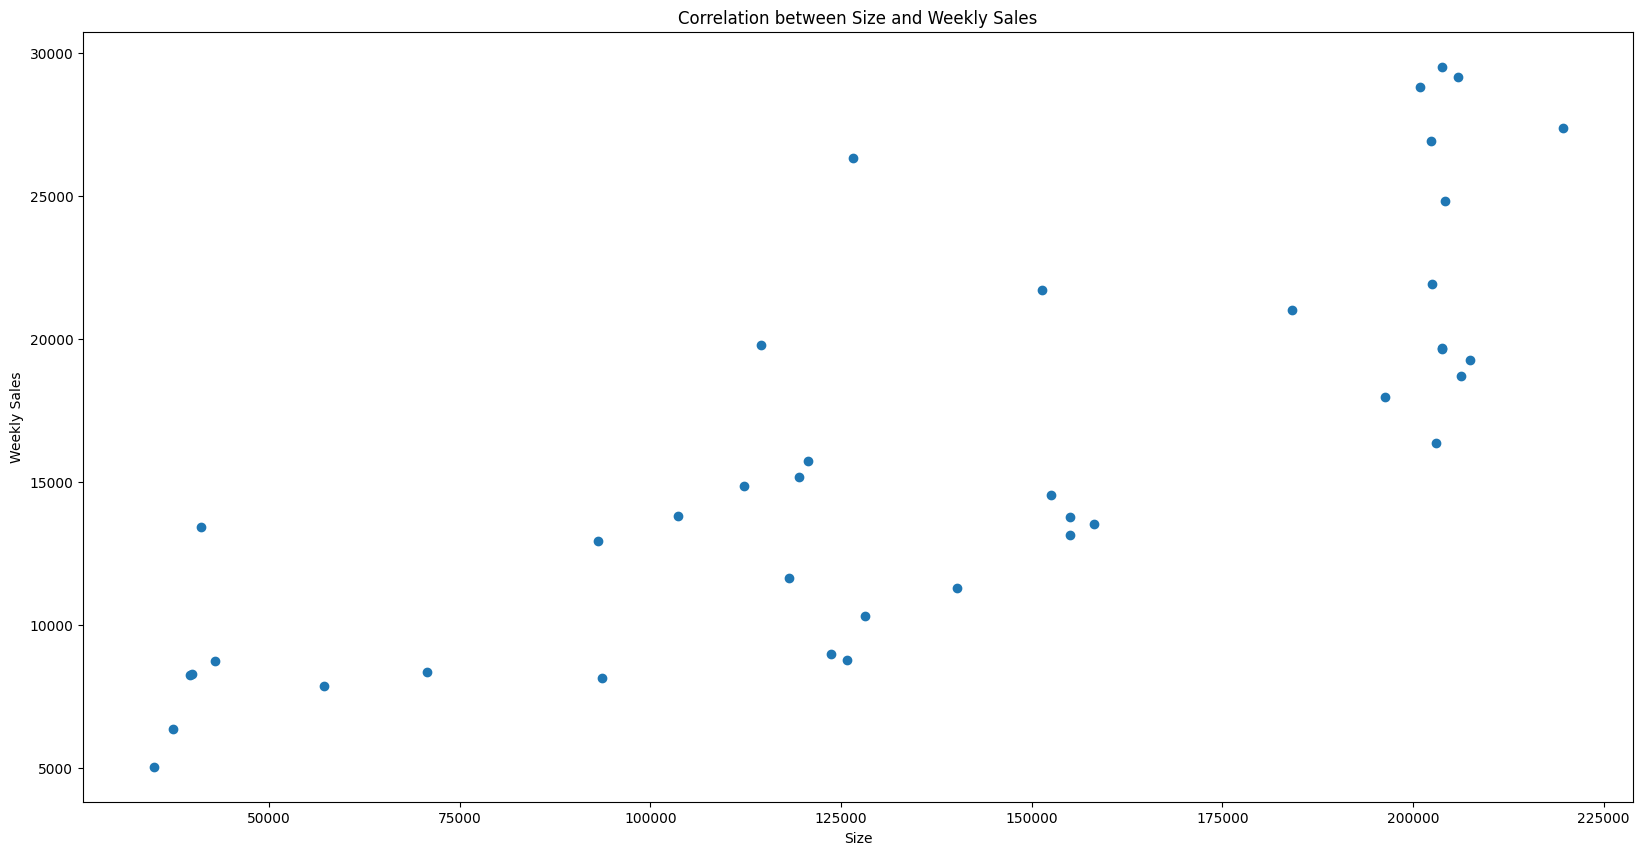

In [ ]:
import matplotlib.pyplot as plt

# Group by "Size" and sum up the "Weekly_Sales", then sort the values
df_size = df.groupby("Size")["Weekly_Sales"].mean().reset_index().sort_values(by="Weekly_Sales", ascending=False)

# Plot correlation chart with x as size and y as weekly sales
plt.figure(figsize=(20, 10))
plt.scatter(x=df_size["Size"], y=df_size["Weekly_Sales"])
plt.xlabel("Size")
plt.ylabel("Weekly Sales")
plt.title("Correlation between Size and Weekly Sales")
plt.show()


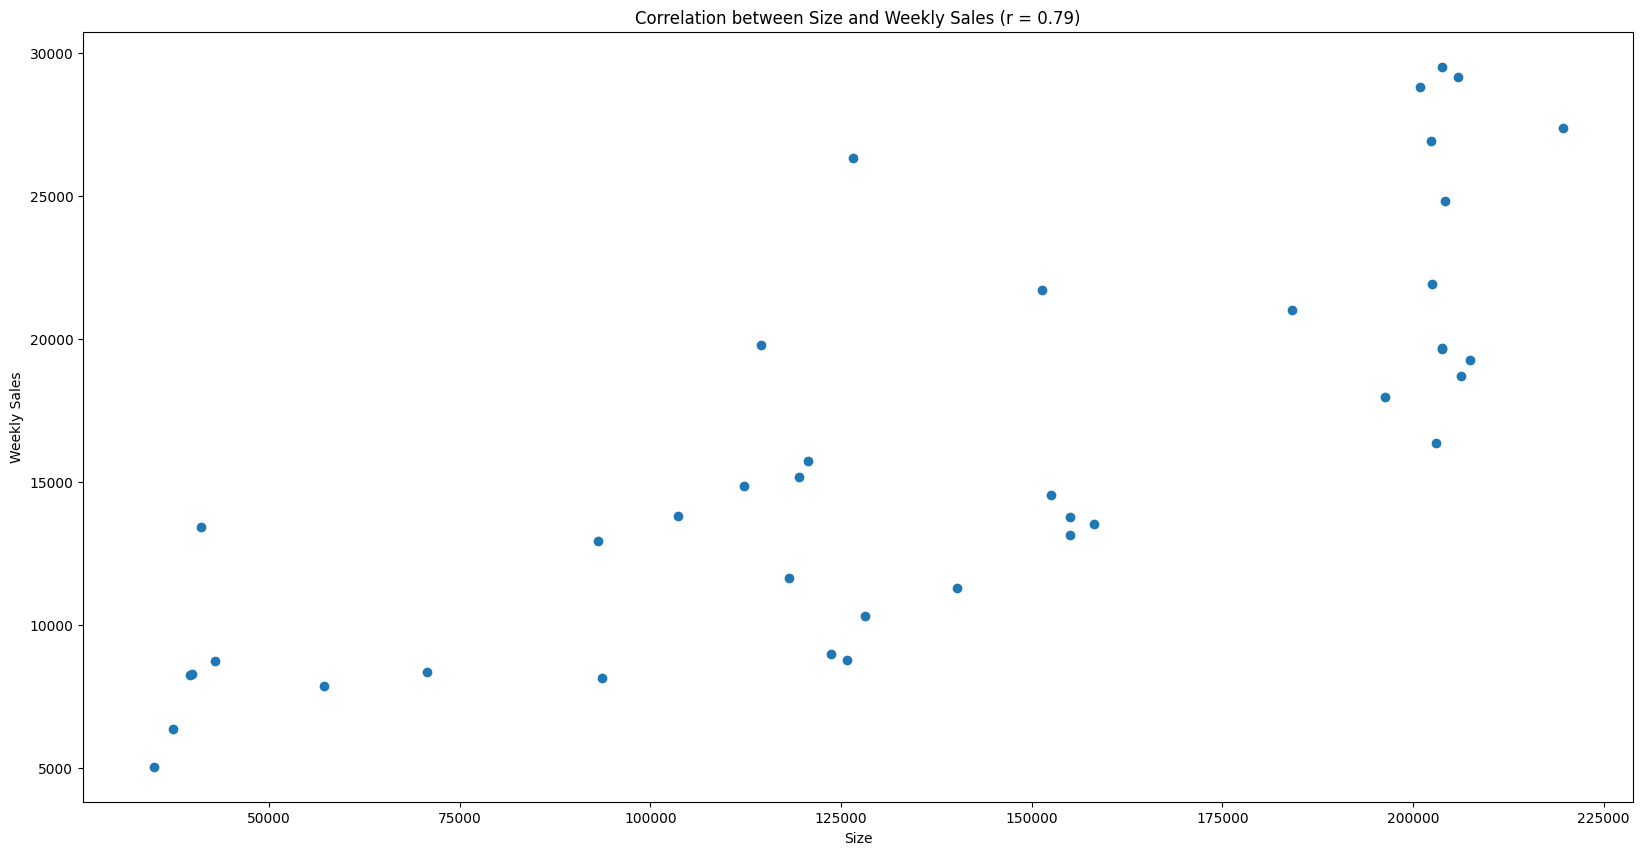

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Group by "Size" and calculate the mean of "Weekly_Sales", then sort the values
df_size = df.groupby("Size")["Weekly_Sales"].mean().reset_index().sort_values(by="Weekly_Sales", ascending=False)

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(df_size["Size"], df_size["Weekly_Sales"])[0, 1]

# Plot scatter chart with x as size and y as weekly sales
plt.figure(figsize=(20, 10))
plt.scatter(x=df_size["Size"], y=df_size["Weekly_Sales"])
plt.xlabel("Size")
plt.ylabel("Weekly Sales")

# Include correlation coefficient in the title
plt.title(f"Correlation between Size and Weekly Sales (r = {correlation_coefficient:.2f})")
plt.show()


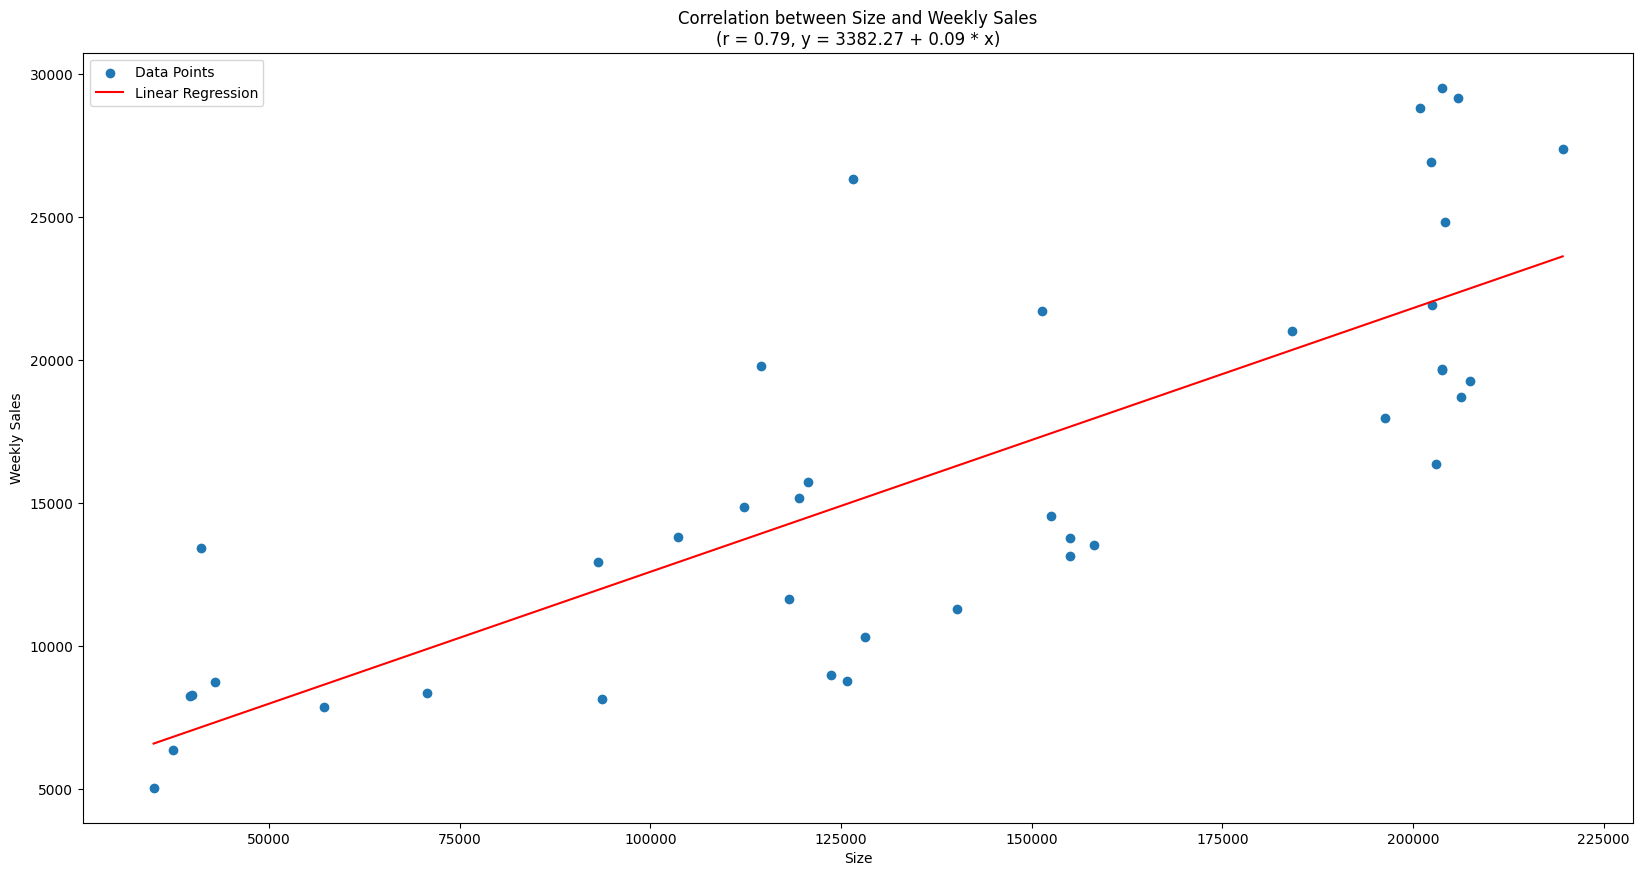

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Group by "Size" and calculate the mean of "Weekly_Sales", then sort the values
df_size = df.groupby("Size")["Weekly_Sales"].mean().reset_index().sort_values(by="Size")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_size["Size"], df_size["Weekly_Sales"])

# Plot scatter chart with x as size and y as weekly sales
plt.figure(figsize=(20, 10))
plt.scatter(x=df_size["Size"], y=df_size["Weekly_Sales"], label="Data Points")
plt.xlabel("Size")
plt.ylabel("Weekly Sales")

# Plot linear regression line
plt.plot(df_size["Size"], intercept + slope * df_size["Size"], color='red', label='Linear Regression')

# Include correlation coefficient and regression equation in the title
plt.title(f"Correlation between Size and Weekly Sales\n(r = {r_value:.2f}, y = {intercept:.2f} + {slope:.2f} * x)")
plt.legend()
plt.show()


### Type


1) Sales across type

2) Box plot of type

In [ ]:
# Change type from 0, 1, 2 to A, B, C
df["Type"] = df["Type"].replace({0: "A", 1: "B", 2: "C"})

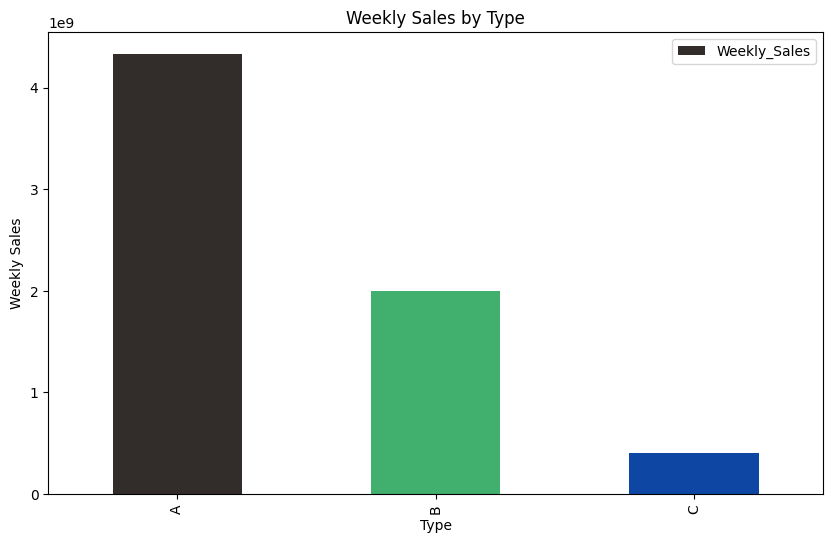

In [ ]:
import matplotlib.pyplot as plt

# Group by "Type" and calculate the sum of weekly sales
df_grouped_by_type = df.groupby("Type")["Weekly_Sales"].sum()

# Define colors for each type (you can customize these colors as needed)
colors = {'A': '#322C2B', 'B': '#41B06E', 'C': '#0E46A3'}

# Create a bar chart with custom colors
plt.figure(figsize=(10, 6))
df_grouped_by_type.plot(kind="bar", color=[colors[type] for type in df_grouped_by_type.index])
plt.title("Weekly Sales by Type")
plt.xlabel("Type")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


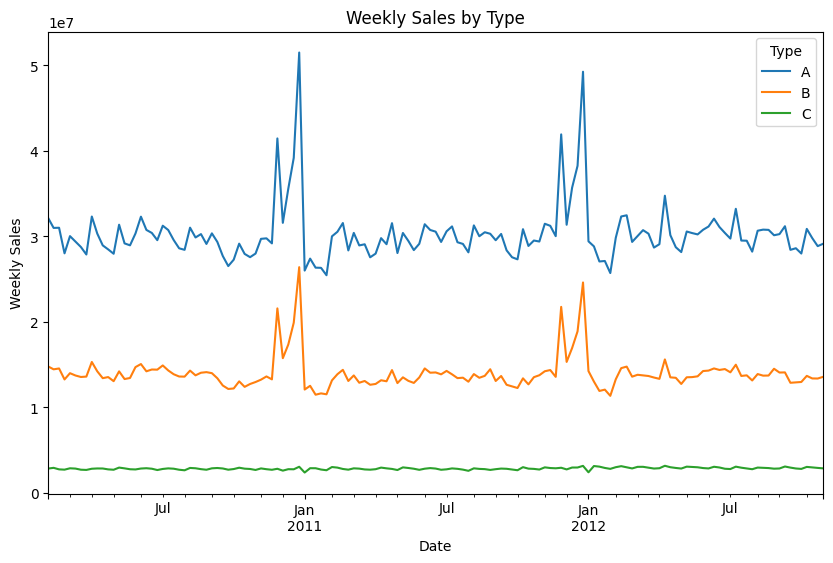

In [ ]:
import matplotlib.pyplot as plt

# Group by "Type" and resample by week
df_grouped_by_type = df.groupby("Type").resample("W")["Weekly_Sales"].sum()

# Create a line chart
df_grouped_by_type.unstack("Type").plot(figsize=(10, 6))  # Unstack to separate types into columns for plotting

plt.title("Weekly Sales by Type")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend(title="Type")
plt.show()


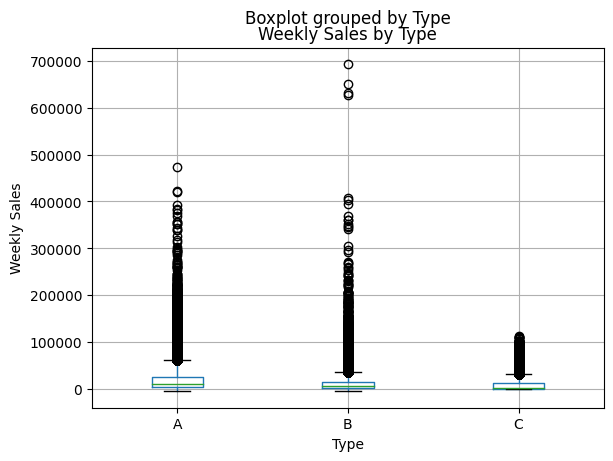

In [ ]:
df.boxplot(column="Weekly_Sales", by="Type")
plt.title("Weekly Sales by Type")
plt.xlabel("Type")
plt.ylabel("Weekly Sales")
plt.show()

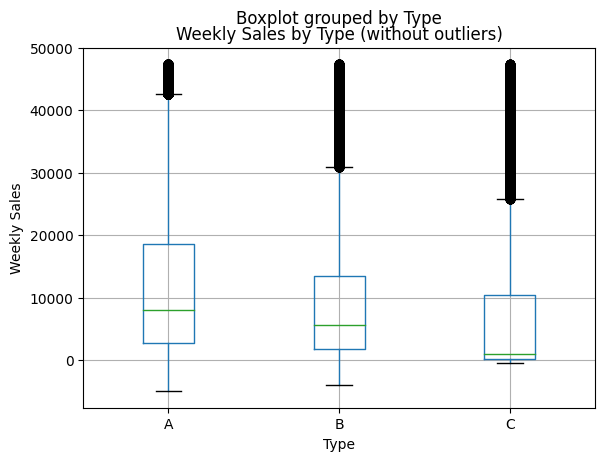

In [ ]:
import matplotlib.pyplot as plt

# Define a function to remove outliers based on interquartile range (IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from the DataFrame
df_filtered = remove_outliers(df, "Weekly_Sales")

# Create a box plot for type using the filtered DataFrame
df_filtered.boxplot(column="Weekly_Sales", by="Type")
plt.title("Weekly Sales by Type (without outliers)")
plt.xlabel("Type")
plt.ylabel("Weekly Sales")
plt.show()


In [ ]:
df_grouped_by_type

Type  Date      
0     2010-02-07    32144126.25
      2010-02-14    30982570.79
      2010-02-21    31000072.76
      2010-02-28    28008995.99
      2010-03-07    30020543.60
                       ...     
2     2012-09-30     2790909.98
      2012-10-07     3024520.69
      2012-10-14     2963270.42
      2012-10-21     2907405.83
      2012-10-28     2854880.01
Name: Weekly_Sales, Length: 429, dtype: float64

# What factors contribute most to weekly sales performance?


1) Lasso
2) Extra Tree Regressor

In [ ]:
df.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Dept,Weekly_Sales,IsHoliday,Month,Year,Day,Week,Markdown
Date,,,,,,,,,,,,,,,
2010-02-05,1,42.31,2.572,211.096358,8.106,A,151315,1,24924.50,0,2,2010,5,5,0.0
2010-02-05,1,42.31,2.572,211.096358,8.106,A,151315,2,50605.27,0,2,2010,5,5,0.0
2010-02-05,1,42.31,2.572,211.096358,8.106,A,151315,3,13740.12,0,2,2010,5,5,0.0
2010-02-05,1,42.31,2.572,211.096358,8.106,A,151315,4,39954.04,0,2,2010,5,5,0.0
2010-02-05,1,42.31,2.572,211.096358,8.106,A,151315,5,32229.38,0,2,2010,5,5,0.0


In [ ]:
# Use linear regression to determine what influences the weekly sales performance?

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


df["Type"].replace({"A": 0, "B": 1, "C": 2}, inplace=True)

if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"])



X, y = df.drop("Weekly_Sales", axis=1), df["Weekly_Sales"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# define the model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

# Get feature names
feature_names = X.columns

# Get coefficients
coefficients = model.coef_

# Print feature importance
for i, (feature, coef) in enumerate(zip(feature_names, coefficients)):
    print('Feature: %s, Score: %.5f' % (feature, coef))

Feature: Store, Score: -89.02901
Feature: Temperature, Score: 23.84039
Feature: Fuel_Price, Score: 716.62317
Feature: CPI, Score: -17.60759
Feature: Unemployment, Score: -239.91167
Feature: Type, Score: 1744.51322
Feature: Size, Score: 0.10090
Feature: Dept, Score: 114.66942
Feature: IsHoliday, Score: 408.02095
Feature: Month, Score: -7096.16296
Feature: Year, Score: -1305.75580
Feature: Day, Score: -252.17880
Feature: Week, Score: 1659.89013
Feature: Markdown, Score: 0.04546


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming df is your DataFrame containing the data

df["Type"].replace({"A": 0, "B": 1, "C": 2}, inplace=True)

if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"])

X = df.drop("Weekly_Sales", axis=1)
y = df["Weekly_Sales"]

# Add a constant term to the independent variables (X) for the intercept
X = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     2877.
Date:                Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:36:48   Log-Likelihood:            -4.8076e+06
No. Observations:              421570   AIC:                         9.615e+06
Df Residuals:                  421555   BIC:                         9.615e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.392e+06   3.14e+05      7.620   

In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

X, y = df.drop("Weekly_Sales", axis = 1), df["Weekly_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

model = Lasso(alpha = 0.1)

model.fit(X_train, y_train)

model.predict(X_test)

coef_ = model.coef_
feature_names = X.columns

print("Nonzero Coefficients:")
for feature, coef in zip(feature_names, coef_):
  if coef != 0:
    print(f"{feature} : {coef}")


Nonzero Coefficients:
Store : -92.07761409958759
Temperature : 19.39498957209752
Fuel_Price : 413.91961800757974
CPI : -17.35705696998837
Unemployment : -227.9633875051656
Type : 1858.9470957187539
Size : 0.10138383660199304
Dept : 110.89438081834838
IsHoliday : 510.8599624264523
Month : 8.634172206567579
Year : -790.4803291342464
Day : -15.356873202118926
Week : 26.140678034657146
Markdown : 0.039657738651764994


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.956e+13, tolerance: 1.436e+10
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Use Recursive Feature Selection

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split


rfe = RFE(RandomForestRegressor(), n_features_to_select = 10)
rfe.fit(X_train, y_train)

rfe.predict(X_test)


for i in range(len(rfe.support_)):

  if rfe.support_[i]:
    print(X.columns[i])


print(rfe.support_)
print(rfe.ranking_)




NameError: name 'X_train' is not defined

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 5.6 MB/s eta 0:00:00


In [ ]:
# import shap

import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X, y = df.drop("Weekly_Sales", axis = 1), df["Weekly_Sales"]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Initialize explainer with the trained model and the training data
explainer = shap.Explainer(rf, X_train)

# Compute SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Summarize the SHAP values to get feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.show()


[0.04360741 0.00878353 0.00365017 0.02024994 0.00938581 0.03764753
 0.09153399 0.72729683 0.00674948 0.01504826 0.00244147 0.01150142
 0.01972747 0.00237669]


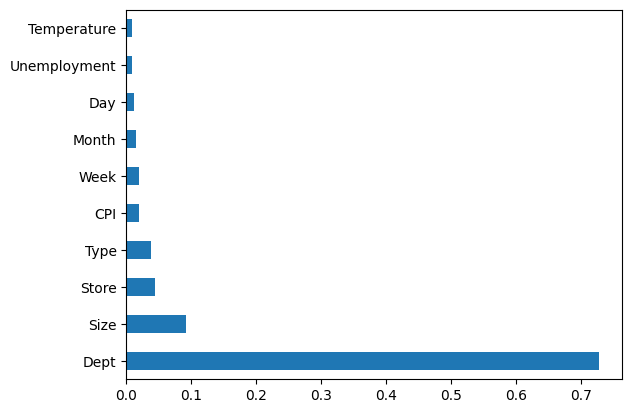

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

X, y = df.drop("Weekly_Sales", axis = 1), df["Weekly_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = ExtraTreesRegressor()
model.fit(X_train, y_train)

print(model.feature_importances_)  # use inbuilt class feature_importances of tree-based regressors

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


[0.04116949 0.0086489  0.00350704 0.02040807 0.00886609 0.08329646
 0.74020313 0.00656044 0.01501562 0.00247019 0.01109381 0.01956412
 0.00238669 0.02723488 0.00728598 0.00228909]


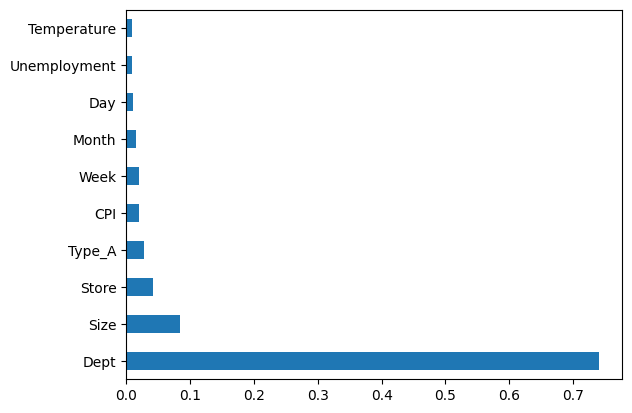

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

X, y = df_one_hot.drop("Weekly_Sales", axis = 1), df_one_hot["Weekly_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = ExtraTreesRegressor()
model.fit(X_train, y_train)

print(model.feature_importances_)  # use inbuilt class feature_importances of tree-based regressors

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Initialize RFE with the linear regression model and the number of desired features
rfe = RFE(model, n_features_to_select=10)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Train the model using the selected features
model.fit(X_train[selected_features], y_train)

# Evaluate the model
train_score = model.score(X_train[selected_features], y_train)
test_score = model.score(X_test[selected_features], y_test)

print("Selected Features:", selected_features)
print("Train Score:", train_score)
print("Test Score:", test_score)


Selected Features: Index(['Store', 'Fuel_Price', 'Unemployment', 'Type', 'Dept', 'IsHoliday',
       'Month', 'Year', 'Day', 'Week'],
      dtype='object')
Train Score: 0.059118449485595304
Test Score: 0.05943521129014817


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split


# Assuming X is your feature matrix and y is your target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = Lasso()

# Initialize RFE with the linear regression model and the number of desired features
rfe = RFE(model, n_features_to_select=10)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Train the model using the selected features
model.fit(X_train[selected_features], y_train)

# Evaluate the model
train_score = model.score(X_train[selected_features], y_train)
test_score = model.score(X_test[selected_features], y_test)

print("Selected Features:", selected_features)
print("Train Score:", train_score)
print("Test Score:", test_score)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.264e+12, tolerance: 1.731e+10



Selected Features: Index(['Store', 'Temperature', 'CPI', 'Unemployment', 'Type', 'Dept',
       'IsHoliday', 'Year', 'Day', 'Week'],
      dtype='object')
Train Score: 0.06037281796041982
Test Score: 0.06088182383994711


In [ ]:
# one hot encoding type
df_one_hot = pd.get_dummies(df, columns=['Type'])

rename_columns = {
    'Type_0': 'Type_A',
    'Type_1': 'Type_B',
    'Type_2': 'Type_C'
}

df_one_hot.rename(columns=rename_columns, inplace=True)

# replace True to 1, False to 0
df_one_hot = df_one_hot.replace({True: 1, False: 0})

df_one_hot.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Size,Dept,Weekly_Sales,IsHoliday,Month,Year,Day,Week,Markdown,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,
2010-02-05,1,42.31,2.572,211.096358,8.106,151315,1,24924.50,0,2,2010,5,5,0.0,1,0,0
2010-02-05,1,42.31,2.572,211.096358,8.106,151315,2,50605.27,0,2,2010,5,5,0.0,1,0,0
2010-02-05,1,42.31,2.572,211.096358,8.106,151315,3,13740.12,0,2,2010,5,5,0.0,1,0,0
2010-02-05,1,42.31,2.572,211.096358,8.106,151315,4,39954.04,0,2,2010,5,5,0.0,1,0,0
2010-02-05,1,42.31,2.572,211.096358,8.106,151315,5,32229.38,0,2,2010,5,5,0.0,1,0,0


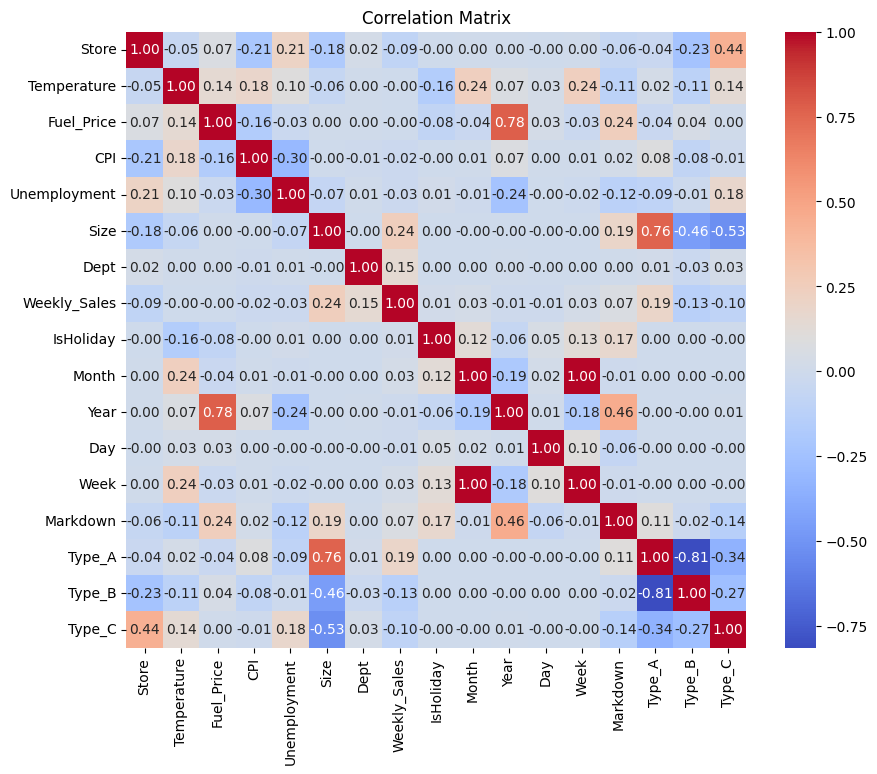

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_one_hot.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


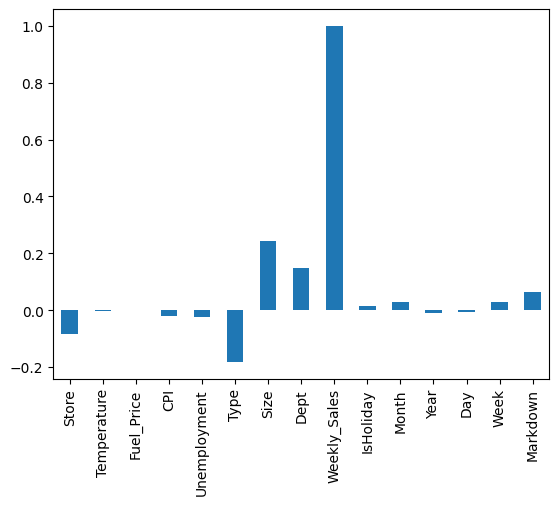

In [ ]:
# create a correlation matrix only for weekly sales:
correlation_matrix = df.corr()
correlation_matrix["Weekly_Sales"].sort_values(ascending=False)

correlation_matrix["Weekly_Sales"].plot(kind="bar")
plt.show()


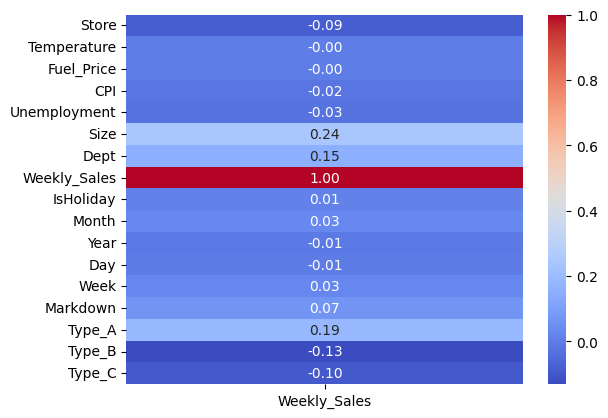

In [ ]:
sns.heatmap(correlation_matrix["Weekly_Sales"].to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


# Can we accurately predict future sales based on historical data and external factors?  
1) Linear Regression: https://colab.research.google.com/drive/1AbPhH7Qedq6Ecw34soKadlT4Z4r9wELe?usp=sharing

2) ARIMA: https://colab.research.google.com/drive/1OX0xqaqVyi4SPp5fEN42u2Rf9Rd_pzoH?usp=sharing

3) Neural Network

4) Tree-based method



In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np


def try_linear_regression(df, model):

    X, y = df.drop('Weekly_Sales', axis=1), df['Weekly_Sales']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)

    # Assuming X_test and y_test are your test data
    y_pred = model.predict(X_test)

    # Calculate R-squared
    r_squared = r2_score(y_test, y_pred)

    print("R-squared:", r_squared)

    # Fit the linear regression model
    model = sm.OLS(y_train, X_train).fit()

    # Get AIC and BIC
    aic = model.aic
    bic = model.bic

    print("AIC:", aic)
    print("BIC:", bic)

    # Print summary
    print(model.summary())

    # Print RMSE, MSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MSE:", mean_squared_error(y_test, y_pred))


X, y = df_one_hot.drop('Weekly_Sales', axis=1), df_one_hot['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_regression_model = {"Linear Regression" : LinearRegression(), "Lasso" : Lasso(), "Ridge" : Ridge()}




In [ ]:
try_linear_regression(df_one_hot, linear_regression_model["Linear Regression"], X_train, y_train, X_test, y_test)

R-squared: 0.09102771642553886
AIC: 7689451.880475173
BIC: 7689623.53803621
                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     2224.
Date:                Fri, 19 Apr 2024   Prob (F-statistic):               0.00
Time:                        04:22:29   Log-Likelihood:            -3.8447e+06
No. Observations:              337256   AIC:                         7.689e+06
Df Residuals:                  337240   BIC:                         7.690e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [ ]:
df.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Dept,Weekly_Sales,IsHoliday,Month,Year,Day,Week,Markdown
Date,,,,,,,,,,,,,,,
2010-02-05,1,42.31,2.572,211.096358,8.106,0,151315,1,24924.50,0,2,2010,5,5,0.0
2010-02-05,1,42.31,2.572,211.096358,8.106,0,151315,2,50605.27,0,2,2010,5,5,0.0
2010-02-05,1,42.31,2.572,211.096358,8.106,0,151315,3,13740.12,0,2,2010,5,5,0.0
2010-02-05,1,42.31,2.572,211.096358,8.106,0,151315,4,39954.04,0,2,2010,5,5,0.0
2010-02-05,1,42.31,2.572,211.096358,8.106,0,151315,5,32229.38,0,2,2010,5,5,0.0


In [ ]:
try_linear_regression(df, linear_regression_model["Lasso"])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.264e+12, tolerance: 1.731e+10



R-squared: 0.08789208954579242
AIC: 7690608.392253835
BIC: 7690758.592619743
                                 OLS Regression Results                                
Dep. Variable:           Weekly_Sales   R-squared (uncentered):                   0.390
Model:                            OLS   Adj. R-squared (uncentered):              0.390
Method:                 Least Squares   F-statistic:                          1.537e+04
Date:                Fri, 19 Apr 2024   Prob (F-statistic):                        0.00
Time:                        04:30:15   Log-Likelihood:                     -3.8453e+06
No. Observations:              337256   AIC:                                  7.691e+06
Df Residuals:                  337242   BIC:                                  7.691e+06
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err         

In [ ]:
try_linear_regression(df_one_hot, linear_regression_model["Lasso"])

R-squared: 0.09101395367520992
AIC: 7689451.880475173
BIC: 7689623.53803621
                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     2224.
Date:                Fri, 19 Apr 2024   Prob (F-statistic):               0.00
Time:                        04:31:38   Log-Likelihood:            -3.8447e+06
No. Observations:              337256   AIC:                         7.689e+06
Df Residuals:                  337240   BIC:                         7.690e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [ ]:
try_linear_regression(df_one_hot, linear_regression_model["Ridge"], X_train, y_train, X_test, y_test)

R-squared: 0.091027683787126
AIC: 7689451.880475173
BIC: 7689623.53803621
                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     2224.
Date:                Fri, 19 Apr 2024   Prob (F-statistic):               0.00
Time:                        04:23:01   Log-Likelihood:            -3.8447e+06
No. Observations:              337256   AIC:                         7.689e+06
Df Residuals:                  337240   BIC:                         7.690e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

# Try Neural Network Approach to predict Weekly Sales


In [ ]:
# Training LTSM to predict Weekly Sales
# univariate data preparation


# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
 X, y = list(), list()
 for i in range(len(sequence)):
 # find the end of this pattern
 end_ix = i + n_steps
 # check if we are beyond the sequence
 if end_ix > len(sequence)-1:
 break
 # gather input and output parts of the pattern
 seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
 X.append(seq_x)
 y.append(seq_y)
 return array(X), array(y)

from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
 X, y = list(), list()
 for i in range(len(sequence)):
 # find the end of this pattern
 end_ix = i + n_steps
 # check if we are beyond the sequence
 if end_ix > len(sequence)-1:
 break
 # gather input and output parts of the pattern
 seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
 X.append(seq_x)
 y.append(seq_y)
 return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
 print(X[i], y[i])

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:

import pandas as pd
import numpy as np
link_url = "https://raw.githubusercontent.com/BrianTruong23/walmart_sales_forecasting/master/data_walmart_store_label_encoding.csv"
link_url_date = "https://media.githubusercontent.com/media/BrianTruong23/walmart_sales_forecasting/master/data_walmart_store_date.csv"

data_date = pd.read_csv(link_url_date)
data_date.drop(data_date.columns[0], axis=1, inplace=True)
data_date.head()

df = pd.read_csv(link_url)
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

# Assuming data_date is your DataFrame with columns "Date" and "Weekly_Sales"
# Assuming "Date" column is not in datetime format yet


df["Date"] = data_date["Date"]
df["Date"] = pd.to_datetime(df["Date"])
df.head()


In [ ]:


# Define the number of time steps (weeks) you want to use as input
n_steps = 4

# Split the dataset into input sequences (X) and corresponding output values (y)
import numpy as np

def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence) - n_steps):
        seq_x = sequence[i:i + n_steps]
        seq_y = sequence[i + n_steps]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


X, y = split_sequence(df['Weekly_Sales'], n_steps)



In [ ]:
df['Weekly_Sales']

Date
2010-02-05    24924.50
2010-02-05    50605.27
2010-02-05    13740.12
2010-02-05    39954.04
2010-02-05    32229.38
                ...   
2012-10-26     2487.80
2012-10-26     5203.31
2012-10-26    56017.47
2012-10-26     6817.48
2012-10-26     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [ ]:
print(X.shape)
print(y.shape)

(421566, 4)
(421566,)


In [ ]:

# Reshape the input sequences to fit the LSTM model requirements
# Reshape the input sequences to fit the LSTM model requirements
n_features = 1  # Assuming each data point is univariate
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test, y_test)

# Use the trained model to make predictions
predictions = model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error:", rmse)

Epoch 1/100
10540/10540 [==============================] - 87s 8ms/step - loss: 421100416.0000
Epoch 2/100
10540/10540 [==============================] - 78s 7ms/step - loss: 405606624.0000
Epoch 3/100
10540/10540 [==============================] - 80s 8ms/step - loss: 359235104.0000
Epoch 4/100
10540/10540 [==============================] - 77s 7ms/step - loss: 356978656.0000
Epoch 5/100
10540/10540 [==============================] - 77s 7ms/step - loss: 328363456.0000
Epoch 6/100
10540/10540 [==============================] - 77s 7ms/step - loss: 319194368.0000
Epoch 7/100
10540/10540 [==============================] - 77s 7ms/step - loss: 306877728.0000
Epoch 8/100
10540/10540 [==============================] - 79s 7ms/step - loss: 290616128.0000
Epoch 9/100
10540/10540 [==============================] - 76s 7ms/step - loss: 291334080.0000
Epoch 10/100
10540/10540 [==============================] - 76s 7ms/step - loss: 285902432.0000
Epoch 11/100
10540/10540 [=======================

KeyboardInterrupt: 

In [ ]:

# Reshape the input sequences to fit the LSTM model requirements
# Reshape the input sequences to fit the LSTM model requirements
n_features = 1  # Assuming each data point is univariate
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Define the split index
split_index = int(len(X) * 0.8)

# Split the data into training and testing sets
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=5, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test, y_test)

# Use the trained model to make predictions
predictions = model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error:", rmse)

Epoch 1/5
10540/10540 [==============================] - 90s 8ms/step - loss: 452419200.0000
Epoch 2/5
10540/10540 [==============================] - 82s 8ms/step - loss: 456609472.0000
Epoch 3/5
10540/10540 [==============================] - 83s 8ms/step - loss: 449697056.0000
Epoch 4/5
10540/10540 [==============================] - 81s 8ms/step - loss: 460145344.0000
Epoch 5/5
2635/2635 [==============================] - 9s 3ms/step
Root Mean Squared Error: 16068.886101901424


In [ ]:
predictions

array([[ 1889.0272],
       [ 4905.518 ],
       [ 4908.004 ],
       ...,
       [10865.207 ],
       [25181.549 ],
       [24094.746 ]], dtype=float32)

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 4, 50)             10400     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(y_test.shape)
print(predictions.shape)

(84314,)
(84314, 1)


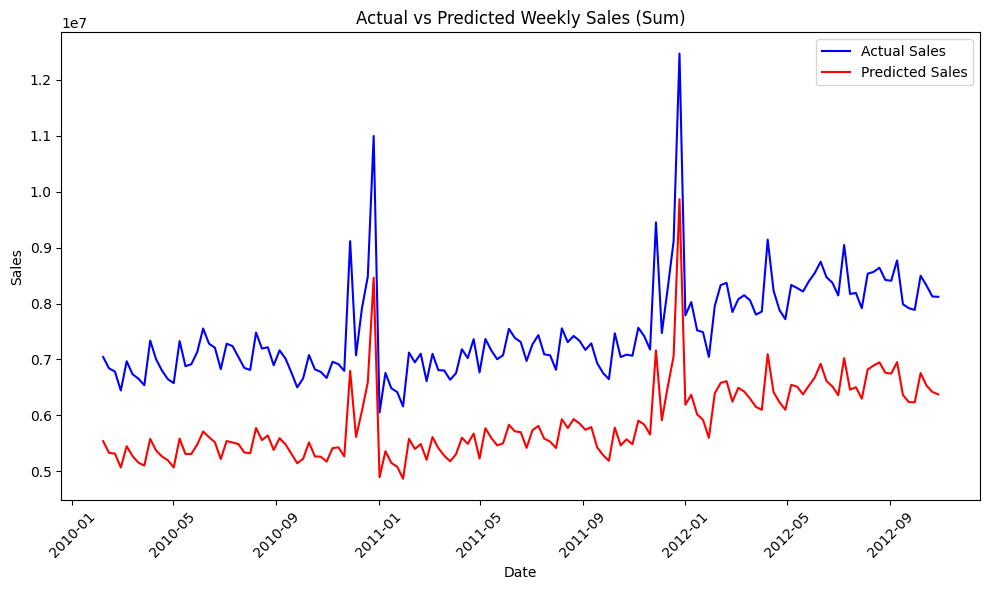

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming y_test is the actual dataset and predictions is the predicted dataset

# Convert arrays to Pandas Series with datetime index
actual_series = pd.Series(y_test, index=df.index[-len(y_test):])
predicted_series = pd.Series(predictions.flatten(), index=df.index[-len(predictions):])

# Resample the actual and predicted sales to weekly frequency and sum the values
actual_weekly_sum = actual_series.resample('W').sum()
predicted_weekly_sum = predicted_series.resample('W').sum()

# Plot actual sales and predicted sales as lines
plt.figure(figsize=(10, 6))
plt.plot(actual_weekly_sum.index, actual_weekly_sum, label='Actual Sales', color='blue', linestyle='-')
plt.plot(predicted_weekly_sum.index, predicted_weekly_sum, label='Predicted Sales', color='red', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Weekly Sales (Sum)')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assuming y_test is the actual dataset and predictions is the predicted dataset

# Convert arrays to Pandas Series with datetime index
actual_series = pd.Series(y_test, index=df.index[-len(y_test):])
predicted_series = pd.Series(predictions.flatten(), index=df.index[-len(predictions):])

# Resample the actual and predicted sales to weekly frequency and sum the values
actual_weekly_sum = actual_series.resample('W').sum()
predicted_weekly_sum = predicted_series.resample('W').sum()

# Create Plotly traces for actual and predicted sales
actual_trace = go.Scatter(x=actual_weekly_sum.index, y=actual_weekly_sum, mode='lines', name='Actual Sales', line=dict(color='blue'))
predicted_trace = go.Scatter(x=predicted_weekly_sum.index, y=predicted_weekly_sum, mode='lines', name='Predicted Sales', line=dict(color='red'))

# Create Plotly figure with subplots
fig = make_subplots(rows=1, cols=1)

# Add traces to the subplot
fig.add_trace(actual_trace)
fig.add_trace(predicted_trace)

# Update layout
fig.update_layout(
    title='Actual vs Predicted Weekly Sales (Sum)',
    xaxis_title='Date',
    yaxis_title='Sales',
    xaxis=dict(tickangle=-45),
    showlegend=True
)

# Show plot
fig.show()


In [ ]:
import plotly.graph_objs as go

def plot_forecasts(train, test, forecasts, title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train.index, y=train['Weekly_Sales'], name='Train'))
    fig.add_trace(go.Scatter(x=test.index, y=test['Weekly_Sales'], name='Test'))
    fig.add_trace(go.Scatter(x=test.index, y=forecasts["Weekly_Sales"], name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Weekly Sales')
    fig.show()


df_weekly_sales_grouped = df["Weekly_Sales"].resample("W").mean()
df_weekly_sales_grouped = pd.DataFrame(df_weekly_sales_grouped)

predicted_series = pd.Series(predictions.flatten(), index=df.index[-len(predictions):])
predicted_weekly_sum = predicted_series.resample('W').mean()
predicted_weekly_sum = pd.DataFrame(predicted_weekly_sum, columns=["Weekly_Sales"])

# Split the data into train and test
split_index = int(len(df_weekly_sales_grouped) * 0.8)
train = df_weekly_sales_grouped[:split_index]
test = df_weekly_sales_grouped[split_index:]

# Assuming predicted_weekly_sum is your forecasted sales for the test period
plot_forecasts(train, test, predicted_weekly_sum, 'Forecasts')


In [ ]:
predicted_weekly_sum

,0
Date,
2010-02-07,5538590.0
2010-02-14,5330279.0
2010-02-21,5316479.0
2010-02-28,5067509.0
2010-03-07,5448476.0
...,...
2012-09-30,6232634.0
2012-10-07,6757310.0
2012-10-14,6533498.0


In [ ]:
test

,Weekly_Sales
Date,
2012-04-15,15663.171451
2012-04-22,15150.430178
2012-04-29,14799.187167
2012-05-06,15947.275103
2012-05-13,15784.015806
2012-05-20,15856.396620
2012-05-27,16284.414590
2012-06-03,16405.589439
2012-06-10,16774.044520


In [ ]:
test

,Store,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Dept,Weekly_Sales,IsHoliday,Month,Year,Day,Week,Markdown
Date,,,,,,,,,,,,,,,
2010-02-07,22565,20796.78,1498.452,95315.289843,4878.928,551,56288493,25415,7043317.14,0,1110,1115550,2775,2775,0.00
2010-02-14,22612,20605.65,1487.933,95486.566929,4879.114,546,56952180,25709,6841329.72,556,1112,1117560,6672,3336,0.00
2010-02-21,22744,22404.37,1484.918,95954.634807,4910.583,555,56707276,25783,6783830.12,0,1118,1123590,10621,3913,0.00
2010-02-28,22740,22853.10,1488.765,96309.407970,4891.280,546,57226894,25857,6444983.24,0,1118,1123590,14534,4472,0.00
2010-03-07,22686,25018.51,1514.782,95925.228357,4885.620,549,56925103,25726,6967803.94,0,1674,1121580,2790,5022,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-30,25888,45098.41,2489.198,113883.934668,4707.340,653,64266600,29138,7886582.25,0,5823,1301764,18116,25233,6385377.04
2012-10-07,26024,43869.10,2495.995,114753.047332,4534.727,650,64739213,29453,8498108.19,0,6500,1307800,3250,26000,4829074.83
2012-10-14,26044,39535.33,2541.622,114682.348088,4563.713,654,64894514,29487,8323506.81,0,6510,1309812,7812,26691,4463687.02


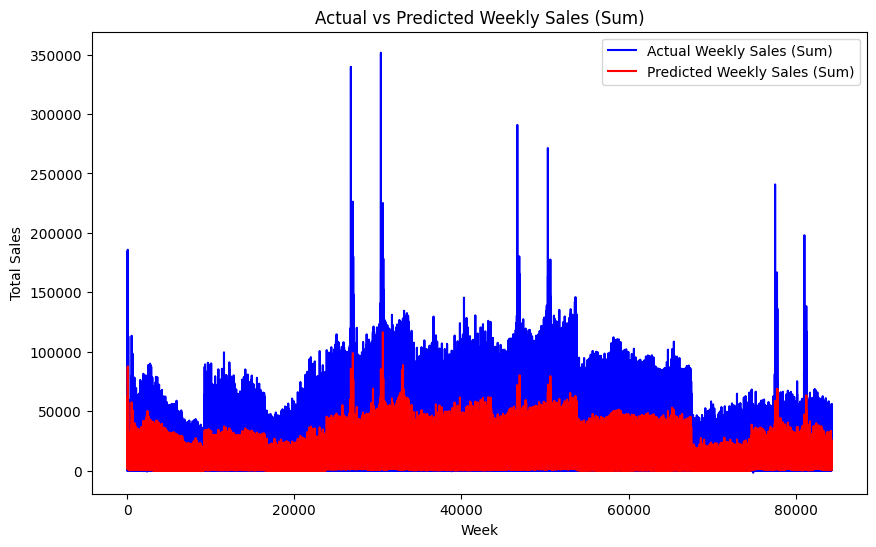

In [ ]:
# Plot predictions against actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Weekly Sales (Sum)', color='blue')
plt.plot(predictions, label='Predicted Weekly Sales (Sum)', color='red')
plt.title('Actual vs Predicted Weekly Sales (Sum)')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [ ]:
# Predict for sum of weekly sales

pd.DataFrame(y_pred, df[:tes])
y_test

In [ ]:

# Reshape the input sequences to fit the LSTM model requirements
# Reshape the input sequences to fit the LSTM model requirements
n_features = 1  # Assuming each data point is univariate
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test, y_test)

# Use the trained model to make predictions
predictions = model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error:", rmse)

Train only the X after resample by Week

In [ ]:


# Define the number of time steps (weeks) you want to use as input
n_steps = 4

# Split the dataset into input sequences (X) and corresponding output values (y)
import numpy as np

def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence) - n_steps):
        seq_x = sequence[i:i + n_steps]
        seq_y = sequence[i + n_steps]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


X_, y_ = split_sequence(df.resample("W")['Weekly_Sales'].sum(), n_steps)



In [ ]:

# Reshape the input sequences to fit the LSTM model requirements
# Reshape the input sequences to fit the LSTM model requirements
n_features = 1  # Assuming each data point is univariate
X_ = X_.reshape((X_.shape[0], X_.shape[1], n_features))

# Define the split index
split_index = int(len(X) * 0.8)

# Split the data into training and testing sets
X_train_, X_test_ = X_[:split_index], X_[split_index:]
y_train_, y_test_ = y_[:split_index], y_[split_index:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_, y_train_, epochs=40, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test_, y_test_)

# Use the trained model to make predictions
y_pred = model.predict(X_test_)

# Calculate the Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Epoch 1/40
4/4 [==============================] - 20s 22ms/step - loss: 2120662248325120.0000
Epoch 2/40
4/4 [==============================] - 0s 19ms/step - loss: 2090047453003776.0000
Epoch 3/40
4/4 [==============================] - 0s 17ms/step - loss: 2061115747991552.0000
Epoch 4/40
4/4 [==============================] - 0s 22ms/step - loss: 1997102213234688.0000
Epoch 5/40
4/4 [==============================] - 0s 22ms/step - loss: 1877477844582400.0000
Epoch 6/40
4/4 [==============================] - 0s 20ms/step - loss: 1740274174787584.0000
Epoch 7/40
4/4 [==============================] - 0s 17ms/step - loss: 1657066699620352.0000
Epoch 8/40
4/4 [==============================] - 0s 20ms/step - loss: 1462963974176768.0000
Epoch 9/40
4/4 [==============================] - 0s 21ms/step - loss: 1215546074857472.0000
Epoch 10/40
4/4 [==============================] - 0s 23ms/step - loss: 1033736619556864.0000
Epoch 11/40
4/4 [==============================] - 0s 19ms/step - lo

In [ ]:
import plotly.graph_objs as go

def plot_forecasts(train, test, forecasts, title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train.index, y=train['Weekly_Sales'], name='Train'))
    fig.add_trace(go.Scatter(x=test.index, y=test['Weekly_Sales'], name='Test'))
    fig.add_trace(go.Scatter(x=test.index, y=forecasts["Weekly_Sales"], name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Weekly Sales')
    fig.show()


df_weekly_sales_grouped = df["Weekly_Sales"].resample("W").sum()
df_weekly_sales_grouped = pd.DataFrame(df_weekly_sales_grouped)

predicted_series_ = pd.Series(y_pred.flatten(), index=df.index[-len(y_pred):])
predicted_series_df = pd.DataFrame(predicted_series_, columns=['Weekly_Sales'])

# Split the data into train and test
split_index = int(len(df_weekly_sales_grouped) * 0.8)
train = df_weekly_sales_grouped[:split_index]
test = df_weekly_sales_grouped[split_index:]

# Assuming predicted_weekly_sum is your forecasted sales for the test period
plot_forecasts(train, test, predicted_series_df, 'Forecasts')


In [ ]:

# Reshape the input sequences to fit the LSTM model requirements
# Reshape the input sequences to fit the LSTM model requirements
n_features = 1  # Assuming each data point is univariate
X_ = X_.reshape((X_.shape[0], X_.shape[1], n_features))

# Define the split index
split_index = int(len(X) * 0.8)

# Split the data into training and testing sets
X_train_, X_test_ = X_[:split_index], X_[split_index:]
y_train_, y_test_ = y_[:split_index], y_[split_index:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_, y_train_, epochs=100, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test_, y_test_)

# Use the trained model to make predictions
y_pred = model.predict(X_test_)

# Calculate the Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Epoch 1/100
4/4 [==============================] - 5s 13ms/step - loss: 2235239359315968.0000
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 2144062572331008.0000
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 2035949521338368.0000
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 1951374233305088.0000
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 1837849926172672.0000
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 1711441254023168.0000
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 1578838702161920.0000
Epoch 8/100
4/4 [==============================] - 0s 11ms/step - loss: 1463217779900416.0000
Epoch 9/100
4/4 [==============================] - 0s 11ms/step - loss: 1367173587009536.0000
Epoch 10/100
4/4 [==============================] - 0s 12ms/step - loss: 1197852420210688.0000
Epoch 11/100
4/4 [==============================] - 0s 18ms

In [ ]:
import plotly.graph_objs as go

def plot_forecasts(train, test, forecasts, title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train.index, y=train['Weekly_Sales'], name='Train'))
    fig.add_trace(go.Scatter(x=test.index, y=test['Weekly_Sales'], name='Test'))
    fig.add_trace(go.Scatter(x=test.index, y=forecasts["Weekly_Sales"], name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Weekly Sales')
    fig.show()


df_weekly_sales_grouped = df["Weekly_Sales"].resample("W").sum()
df_weekly_sales_grouped = pd.DataFrame(df_weekly_sales_grouped)

predicted_series_ = pd.Series(y_pred.flatten(), index=df.index[-len(y_pred):])
predicted_series_df = pd.DataFrame(predicted_series_, columns=['Weekly_Sales'])

# Split the data into train and test
split_index = int(len(df_weekly_sales_grouped) * 0.8)
train = df_weekly_sales_grouped[:split_index]
test = df_weekly_sales_grouped[split_index:]

# Assuming predicted_weekly_sum is your forecasted sales for the test period
plot_forecasts(train, test, predicted_series_df, 'Forecasts')


In [ ]:

# Reshape the input sequences to fit the LSTM model requirements
# Reshape the input sequences to fit the LSTM model requirements
n_features = 1  # Assuming each data point is univariate
X_ = X_.reshape((X_.shape[0], X_.shape[1], n_features))

# Define the split index
split_index = int(len(X) * 0.8)

# Split the data into training and testing sets
X_train_, X_test_ = X_[:split_index], X_[split_index:]
y_train_, y_test_ = y_[:split_index], y_[split_index:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_, y_train_, epochs=350, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test_, y_test_)

# Use the trained model to make predictions
y_pred = model.predict(X_test_)

# Calculate the Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Epoch 1/350
4/4 [==============================] - 7s 20ms/step - loss: 2180004469276672.0000
Epoch 2/350
4/4 [==============================] - 0s 21ms/step - loss: 2134498753904640.0000
Epoch 3/350
4/4 [==============================] - 0s 15ms/step - loss: 2108801025048576.0000
Epoch 4/350
4/4 [==============================] - 0s 16ms/step - loss: 2101195040620544.0000
Epoch 5/350
4/4 [==============================] - 0s 16ms/step - loss: 2091952673652736.0000
Epoch 6/350
4/4 [==============================] - 0s 19ms/step - loss: 2062812931162112.0000
Epoch 7/350
4/4 [==============================] - 0s 22ms/step - loss: 2020623735848960.0000
Epoch 8/350
4/4 [==============================] - 0s 19ms/step - loss: 1981866756276224.0000
Epoch 9/350
4/4 [==============================] - 0s 17ms/step - loss: 1903853909835776.0000
Epoch 10/350
4/4 [==============================] - 0s 21ms/step - loss: 1897311332466688.0000
Epoch 11/350
4/4 [==============================] - 0s 16ms

1/1 [==============================] - 0s 392ms/step - loss: 4505639845888.0000


1/1 [==============================] - 0s 303ms/step
Root Mean Squared Error: 2122649.387531313


In [ ]:
import plotly.graph_objs as go

def plot_forecasts(train, test, forecasts, title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train.index, y=train['Weekly_Sales'], name='Train'))
    fig.add_trace(go.Scatter(x=test.index, y=test['Weekly_Sales'], name='Test'))
    fig.add_trace(go.Scatter(x=test.index, y=forecasts["Weekly_Sales"], name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Weekly Sales')
    fig.show()


df_weekly_sales_grouped = df["Weekly_Sales"].resample("W").sum()
df_weekly_sales_grouped = pd.DataFrame(df_weekly_sales_grouped)

predicted_series_ = pd.Series(y_pred.flatten(), index=df.index[-len(y_pred):])
predicted_series_df = pd.DataFrame(predicted_series_, columns=['Weekly_Sales'])

# Split the data into train and test
split_index = int(len(df_weekly_sales_grouped) * 0.8)
train = df_weekly_sales_grouped[:split_index]
test = df_weekly_sales_grouped[split_index:]

# Assuming predicted_weekly_sum is your forecasted sales for the test period
plot_forecasts(train, test, predicted_series_df, 'Forecasts')


Update the layers

In [ ]:

# Reshape the input sequences to fit the LSTM model requirements
# Reshape the input sequences to fit the LSTM model requirements
n_features = 1  # Assuming each data point is univariate
X_ = X_.reshape((X_.shape[0], X_.shape[1], n_features))

# Define the split index
split_index = int(len(X) * 0.8)

# Split the data into training and testing sets
X_train_, X_test_ = X_[:split_index], X_[split_index:]
y_train_, y_test_ = y_[:split_index], y_[split_index:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_, y_train_, epochs=350, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test_, y_test_)

# Use the trained model to make predictions
y_pred = model.predict(X_test_)

# Calculate the Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Epoch 1/350
4/4 [==============================] - 4s 10ms/step - loss: 2589993860071424.0000
Epoch 2/350
4/4 [==============================] - 0s 9ms/step - loss: 2484437522579456.0000
Epoch 3/350
4/4 [==============================] - 0s 9ms/step - loss: 2390434110242816.0000
Epoch 4/350
4/4 [==============================] - 0s 10ms/step - loss: 2334263185768448.0000
Epoch 5/350
4/4 [==============================] - 0s 9ms/step - loss: 2298860575653888.0000
Epoch 6/350
4/4 [==============================] - 0s 10ms/step - loss: 2259611822325760.0000
Epoch 7/350
4/4 [==============================] - 0s 10ms/step - loss: 2171265284571136.0000
Epoch 8/350
4/4 [==============================] - 0s 9ms/step - loss: 2070924111118336.0000
Epoch 9/350
4/4 [==============================] - 0s 10ms/step - loss: 2006027557928960.0000
Epoch 10/350
4/4 [==============================] - 0s 11ms/step - loss: 1892387689332736.0000
Epoch 11/350
4/4 [==============================] - 0s 11ms/ste

In [ ]:
import plotly.graph_objs as go

def plot_forecasts(train, test, forecasts, title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train.index, y=train['Weekly_Sales'], name='Train'))
    fig.add_trace(go.Scatter(x=test.index, y=test['Weekly_Sales'], name='Test'))
    fig.add_trace(go.Scatter(x=test.index, y=forecasts["Weekly_Sales"], name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Weekly Sales')
    fig.show()


df_weekly_sales_grouped = df["Weekly_Sales"].resample("W").sum()
df_weekly_sales_grouped = pd.DataFrame(df_weekly_sales_grouped)

predicted_series_ = pd.Series(y_pred.flatten(), index=df.index[-len(y_pred):])
predicted_series_df = pd.DataFrame(predicted_series_, columns=['Weekly_Sales'])

# Split the data into train and test
split_index = int(len(df_weekly_sales_grouped) * 0.8)
train = df_weekly_sales_grouped[:split_index]
test = df_weekly_sales_grouped[split_index:]

# Assuming predicted_weekly_sum is your forecasted sales for the test period
plot_forecasts(train, test, predicted_series_df, 'Forecasts')


Train using other features in X

In [ ]:
df.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Dept,Weekly_Sales,IsHoliday,Month,Year,Day,Week,Markdown
Date,,,,,,,,,,,,,,,
2010-02-05,1,42.31,2.572,211.096358,8.106,0,151315,1,24924.50,0,2,2010,5,5,0.0
2010-02-05,1,42.31,2.572,211.096358,8.106,0,151315,2,50605.27,0,2,2010,5,5,0.0
2010-02-05,1,42.31,2.572,211.096358,8.106,0,151315,3,13740.12,0,2,2010,5,5,0.0
2010-02-05,1,42.31,2.572,211.096358,8.106,0,151315,4,39954.04,0,2,2010,5,5,0.0
2010-02-05,1,42.31,2.572,211.096358,8.106,0,151315,5,32229.38,0,2,2010,5,5,0.0


In [ ]:
df_one_hot.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Size,Dept,Weekly_Sales,IsHoliday,Month,Year,Day,Week,Markdown,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,
2010-02-05,1,42.31,2.572,211.096358,8.106,151315,1,24924.50,0,2,2010,5,5,0.0,1,0,0
2010-02-05,1,42.31,2.572,211.096358,8.106,151315,2,50605.27,0,2,2010,5,5,0.0,1,0,0
2010-02-05,1,42.31,2.572,211.096358,8.106,151315,3,13740.12,0,2,2010,5,5,0.0,1,0,0
2010-02-05,1,42.31,2.572,211.096358,8.106,151315,4,39954.04,0,2,2010,5,5,0.0,1,0,0
2010-02-05,1,42.31,2.572,211.096358,8.106,151315,5,32229.38,0,2,2010,5,5,0.0,1,0,0


In [ ]:
important_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', "Size", "Dept", "Type_A", "Weekly_Sales"]
df_one_hot_important = df_one_hot[important_features]

In [ ]:
df_one_hot_important_resample_ = df_one_hot_important.resample('W').sum()

In [ ]:
df_one_hot_important_resample_

,Temperature,Fuel_Price,CPI,Unemployment,Size,Dept,Type_A,Weekly_Sales
Date,,,,,,,,
2010-02-07,98336.32,8031.304,494662.287628,25344.240,406107232,130557,1512,49750740.50
2010-02-14,98617.51,7969.678,494787.511155,25324.966,406812940,131179,1512,48336677.63
2010-02-21,110263.05,7959.505,498168.102706,25531.797,408678503,131897,1519,48276993.78
2010-02-28,113995.84,7925.330,494856.196950,25264.617,405309063,130161,1506,43968571.13
2010-03-07,124749.05,8042.466,493789.321202,25237.995,405026220,129670,1510,46871470.30
...,...,...,...,...,...,...,...,...
2012-09-30,201865.51,11428.121,521073.972005,21402.982,402858901,130785,1505,43734899.40
2012-10-07,194799.47,11452.944,523770.802422,20659.811,405732233,132468,1523,47566639.31
2012-10-14,172484.98,11653.301,526610.121540,20788.519,407324080,133371,1523,46128514.25


In [ ]:
import numpy as np

n_steps = 4

def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence) - n_steps):
        seq_x = sequence.iloc[i:i + n_steps][['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size', 'Type_A', 'Weekly_Sales']]
        seq_y = sequence.iloc[i + n_steps]['Weekly_Sales']
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Assuming df_one_hot_important is your DataFrame containing the features and 'Weekly_Sales' column
X_, y_ = split_sequence(df_one_hot_important_resample_, n_steps)


In [ ]:
import numpy as np

n_steps = 4

def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence) - n_steps):
        seq_x = sequence.iloc[i:i + n_steps]
        seq_y = sequence.iloc[i + n_steps]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Assuming df_one_hot_important is your DataFrame containing the features and 'Weekly_Sales' column
X_, y_ = split_sequence(df_one_hot_important_resample_["Weekly_Sales"], n_steps)


In [ ]:
print(X_.shape)
print(y_.shape)

(139, 4)
(139,)


In [ ]:

# Reshape the input sequences to fit the LSTM model requirements
# Reshape the input sequences to fit the LSTM model requirements
# n_features = X_.shape[2] # Assuming each data point is univariate
n_features = 1
X_ = X_.reshape((X_.shape[0], X_.shape[1], n_features))

# Define the split index
split_index = int(len(X) * 0.8)

# Split the data into training and testing sets
X_train_, X_test_ = X_[:split_index], X_[split_index:]
y_train_, y_test_ = y_[:split_index], y_[split_index:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_, y_train_, epochs=350, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test_, y_test_)

# Use the trained model to make predictions
y_pred = model.predict(X_test_)

# Calculate the Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Epoch 1/350
4/4 [==============================] - 6s 17ms/step - loss: 2132492601524224.0000
Epoch 2/350
4/4 [==============================] - 0s 16ms/step - loss: 2101265639145472.0000
Epoch 3/350
4/4 [==============================] - 0s 17ms/step - loss: 2072870133956608.0000
Epoch 4/350
4/4 [==============================] - 0s 12ms/step - loss: 1976259005382656.0000
Epoch 5/350
4/4 [==============================] - 0s 12ms/step - loss: 1872614062555136.0000
Epoch 6/350
4/4 [==============================] - 0s 13ms/step - loss: 1782870184034304.0000
Epoch 7/350
4/4 [==============================] - 0s 13ms/step - loss: 1735618698674176.0000
Epoch 8/350
4/4 [==============================] - 0s 12ms/step - loss: 1650731622858752.0000
Epoch 9/350
4/4 [==============================] - 0s 13ms/step - loss: 1547045609406464.0000
Epoch 10/350
4/4 [==============================] - 0s 13ms/step - loss: 1565448604745728.0000
Epoch 11/350
4/4 [==============================] - 0s 12ms

In [ ]:

# Reshape the input sequences to fit the LSTM model requirements
# Reshape the input sequences to fit the LSTM model requirements
# n_features = X_.shape[2] # Assuming each data point is univariate
n_features = 1
X_ = X_.reshape((X_.shape[0], X_.shape[1], n_features))

# Define the split index
split_index = int(len(X) * 0.8)

# Split the data into training and testing sets
X_train_, X_test_ = X_[:split_index], X_[split_index:]
y_train_, y_test_ = y_[:split_index], y_[split_index:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_, y_train_, epochs=600, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test_, y_test_)

# Use the trained model to make predictions
y_pred = model.predict(X_test_)

# Calculate the Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Epoch 1/600
4/4 [==============================] - 7s 19ms/step - loss: 2387550039703552.0000
Epoch 2/600
4/4 [==============================] - 0s 15ms/step - loss: 2355392008945664.0000
Epoch 3/600
4/4 [==============================] - 0s 12ms/step - loss: 2334874413301760.0000
Epoch 4/600
4/4 [==============================] - 0s 17ms/step - loss: 2356301736706048.0000
Epoch 5/600
4/4 [==============================] - 0s 14ms/step - loss: 2451996023980032.0000
Epoch 6/600
4/4 [==============================] - 0s 13ms/step - loss: 2337216781090816.0000
Epoch 7/600
4/4 [==============================] - 0s 14ms/step - loss: 2275373815431168.0000
Epoch 8/600
4/4 [==============================] - 0s 13ms/step - loss: 2234497806368768.0000
Epoch 9/600
4/4 [==============================] - 0s 12ms/step - loss: 2202564456087552.0000
Epoch 10/600
4/4 [==============================] - 0s 13ms/step - loss: 2178350906867712.0000
Epoch 11/600
4/4 [==============================] - 0s 18ms

In [ ]:
from sklearn.metrics import r2_score
import numpy as np

# Number of parameters
n_params = sum([np.prod(w.shape) for w in model.trainable_weights])

# Number of observations
n_obs = len(X_test_)

# Calculate AIC
aic = 2 * n_params - 2 * np.log(mse)

# Calculate BIC
bic = -2 * np.log(mse) + n_params * np.log(n_obs)

# Calculate R²
r_squared = r2_score(y_test_, y_pred)

print("AIC:", aic)
print("BIC:", bic)
print("R²:", r_squared)


AIC: 61241.29318066917
BIC: 102074.69362204934
R²: -3.9048734230129334


In [ ]:
import plotly.graph_objs as go

def plot_forecasts(train, test, forecasts, title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train.index, y=train['Weekly_Sales'], name='Train'))
    fig.add_trace(go.Scatter(x=test.index, y=test['Weekly_Sales'], name='Test'))
    fig.add_trace(go.Scatter(x=test.index, y=forecasts["Weekly_Sales"], name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Weekly Sales')
    fig.show()


df_weekly_sales_grouped = df["Weekly_Sales"].resample("W").sum()
df_weekly_sales_grouped = pd.DataFrame(df_weekly_sales_grouped)

predicted_series_ = pd.Series(y_pred.flatten(), index=df.index[-len(y_pred):])
predicted_series_df = pd.DataFrame(predicted_series_, columns=['Weekly_Sales'])

# Split the data into train and test
split_index = int(len(df_weekly_sales_grouped) * 0.8)
train = df_weekly_sales_grouped[:split_index]
test = df_weekly_sales_grouped[split_index:]

# Assuming predicted_weekly_sum is your forecasted sales for the test period
plot_forecasts(train, test, predicted_series_df, 'Forecasts')


350

In [ ]:

# Reshape the input sequences to fit the LSTM model requirements
# Reshape the input sequences to fit the LSTM model requirements
# n_features = X_.shape[2] # Assuming each data point is univariate
n_features = 1
X_ = X_.reshape((X_.shape[0], X_.shape[1], n_features))

# Define the split index
split_index = int(len(X) * 0.8)

# Split the data into training and testing sets
X_train_, X_test_ = X_[:split_index], X_[split_index:]
y_train_, y_test_ = y_[:split_index], y_[split_index:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_, y_train_, epochs=350, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test_, y_test_)

# Use the trained model to make predictions
y_pred = model.predict(X_test_)

# Calculate the Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)



Epoch 1/350
4/4 [==============================] - 10s 22ms/step - loss: 2366682135789568.0000
Epoch 2/350
4/4 [==============================] - 0s 17ms/step - loss: 2262033378574336.0000
Epoch 3/350
4/4 [==============================] - 0s 21ms/step - loss: 2110628802068480.0000
Epoch 4/350
4/4 [==============================] - 0s 23ms/step - loss: 1984486820544512.0000
Epoch 5/350
4/4 [==============================] - 0s 23ms/step - loss: 1898916308058112.0000
Epoch 6/350
4/4 [==============================] - 0s 19ms/step - loss: 1786452589412352.0000
Epoch 7/350
4/4 [==============================] - 0s 17ms/step - loss: 1685897204465664.0000
Epoch 8/350
4/4 [==============================] - 0s 24ms/step - loss: 1507308974637056.0000
Epoch 9/350
4/4 [==============================] - 0s 15ms/step - loss: 1382667413094400.0000
Epoch 10/350
4/4 [==============================] - 0s 15ms/step - loss: 1311523964190720.0000
Epoch 11/350
4/4 [==============================] - 0s 20m

In [ ]:
from sklearn.metrics import r2_score
import numpy as np

# Number of parameters
n_params = sum([np.prod(w.shape) for w in model.trainable_weights])

# Number of observations
n_obs = len(X_test_)

# Calculate AIC
aic = 2 * n_params - 2 * np.log(mse)

# Calculate BIC
bic = -2 * np.log(mse) + n_params * np.log(n_obs)

# Calculate R²
r_squared = r2_score(y_test_, y_pred)

print("AIC:", aic)
print("BIC:", bic)
print("R²:", r_squared)


AIC: 61243.373454694774
BIC: 102076.77389607496
R²: -0.7334134123436999


In [ ]:
import plotly.graph_objs as go

def plot_forecasts(train, test, forecasts, title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train.index, y=train['Weekly_Sales'], name='Train'))
    fig.add_trace(go.Scatter(x=test.index, y=test['Weekly_Sales'], name='Test'))
    fig.add_trace(go.Scatter(x=test.index, y=forecasts["Weekly_Sales"], name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Weekly Sales')
    fig.show()


df_weekly_sales_grouped = df["Weekly_Sales"].resample("W").sum()
df_weekly_sales_grouped = pd.DataFrame(df_weekly_sales_grouped)

predicted_series_ = pd.Series(y_pred.flatten(), index=df.index[-len(y_pred):])
predicted_series_df = pd.DataFrame(predicted_series_, columns=['Weekly_Sales'])

# Split the data into train and test
split_index = int(len(df_weekly_sales_grouped) * 0.8)
train = df_weekly_sales_grouped[:split_index]
test = df_weekly_sales_grouped[split_index:]

# Assuming predicted_weekly_sum is your forecasted sales for the test period
plot_forecasts(train, test, predicted_series_df, 'Forecasts')


300 epochs 100 50

In [ ]:
from keras import regularizers

# Define the LSTM model with regularization
model = Sequential()
model.add(LSTM(30, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(40, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, kernel_regularizer=regularizers.l2(0.01)))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_, y_train_, epochs=50, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test_, y_test_)

# Use the trained model to make predictions
y_pred = model.predict(X_test_)




Epoch 1/50
4/4 [==============================] - 8s 15ms/step - loss: 2236660456620032.0000
Epoch 2/50
4/4 [==============================] - 0s 15ms/step - loss: 2048233396240384.0000
Epoch 3/50
4/4 [==============================] - 0s 13ms/step - loss: 1936812549341184.0000
Epoch 4/50
4/4 [==============================] - 0s 15ms/step - loss: 1861735044612096.0000
Epoch 5/50
4/4 [==============================] - 0s 16ms/step - loss: 1788632419532800.0000
Epoch 6/50
4/4 [==============================] - 0s 14ms/step - loss: 1704123703492608.0000
Epoch 7/50
4/4 [==============================] - 0s 9ms/step - loss: 1609667037888512.0000
Epoch 8/50
4/4 [==============================] - 0s 8ms/step - loss: 1495897783402496.0000
Epoch 9/50
4/4 [==============================] - 0s 9ms/step - loss: 1331977672196096.0000
Epoch 10/50
4/4 [==============================] - 0s 11ms/step - loss: 1144062249795584.0000
Epoch 11/50
4/4 [==============================] - 0s 13ms/step - loss: 

In [ ]:
# Calculate the Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

ValueError: Input contains NaN.

In [ ]:
from sklearn.metrics import r2_score
import numpy as np

# Number of parameters
n_params = sum([np.prod(w.shape) for w in model.trainable_weights])

# Number of observations
n_obs = len(X_test_)

# Calculate AIC
aic = 2 * n_params - 2 * np.log(mse)

# Calculate BIC
bic = -2 * np.log(mse) + n_params * np.log(n_obs)

# Calculate R²
r_squared = r2_score(y_test_, y_pred)

print("AIC:", aic)
print("BIC:", bic)
print("R²:", r_squared)


AIC: 62096.64374668528
BIC: 103502.89212744079
R²: -49.14638687115584


In [ ]:
import plotly.graph_objs as go

def plot_forecasts(train, test, forecasts, title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train.index, y=train['Weekly_Sales'], name='Train'))
    fig.add_trace(go.Scatter(x=test.index, y=test['Weekly_Sales'], name='Test'))
    fig.add_trace(go.Scatter(x=test.index, y=forecasts["Weekly_Sales"], name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Weekly Sales')
    fig.show()


df_weekly_sales_grouped = df["Weekly_Sales"].resample("W").sum()
df_weekly_sales_grouped = pd.DataFrame(df_weekly_sales_grouped)

predicted_series_ = pd.Series(y_pred.flatten(), index=df.index[-len(y_pred):])
predicted_series_df = pd.DataFrame(predicted_series_, columns=['Weekly_Sales'])

# Split the data into train and test
split_index = int(len(df_weekly_sales_grouped) * 0.8)
train = df_weekly_sales_grouped[:split_index]
test = df_weekly_sales_grouped[split_index:]

# Assuming predicted_weekly_sum is your forecasted sales for the test period
plot_forecasts(train, test, predicted_series_df, 'Forecasts')


In [ ]:

# Reshape the input sequences to fit the LSTM model requirements
# Reshape the input sequences to fit the LSTM model requirements
n_features = X_.shape[2] # Assuming each data point is univariate
X_ = X_.reshape((X_.shape[0], X_.shape[1], n_features))

# Define the split index
split_index = int(len(X) * 0.8)

# Split the data into training and testing sets
X_train_, X_test_ = X_[:split_index], X_[split_index:]
y_train_, y_test_ = y_[:split_index], y_[split_index:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_, y_train_, epochs=350, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test_, y_test_)

# Use the trained model to make predictions
y_pred = model.predict(X_test_)

# Calculate the Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Epoch 1/350
4/4 [==============================] - 5s 12ms/step - loss: 1235727186657280.0000
Epoch 2/350
4/4 [==============================] - 0s 11ms/step - loss: 1308605668130816.0000
Epoch 3/350
4/4 [==============================] - 0s 11ms/step - loss: 976321026981888.0000
Epoch 4/350
4/4 [==============================] - 0s 12ms/step - loss: 766950967869440.0000
Epoch 5/350
4/4 [==============================] - 0s 13ms/step - loss: 556945522032640.0000
Epoch 6/350
4/4 [==============================] - 0s 13ms/step - loss: 349925581783040.0000
Epoch 7/350
4/4 [==============================] - 0s 17ms/step - loss: 191589397823488.0000
Epoch 8/350
4/4 [==============================] - 0s 15ms/step - loss: 88251847147520.0000
Epoch 9/350
4/4 [==============================] - 0s 16ms/step - loss: 40635910324224.0000
Epoch 10/350
4/4 [==============================] - 0s 17ms/step - loss: 63890712952832.0000
Epoch 11/350
4/4 [==============================] - 0s 12ms/step - los

In [ ]:
import plotly.graph_objs as go

def plot_forecasts(train, test, forecasts, title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train.index, y=train['Weekly_Sales'], name='Train'))
    fig.add_trace(go.Scatter(x=test.index, y=test['Weekly_Sales'], name='Test'))
    fig.add_trace(go.Scatter(x=test.index, y=forecasts["Weekly_Sales"], name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Weekly Sales')
    fig.show()


df_weekly_sales_grouped = df["Weekly_Sales"].resample("W").sum()
df_weekly_sales_grouped = pd.DataFrame(df_weekly_sales_grouped)

predicted_series_ = pd.Series(y_pred.flatten(), index=df.index[-len(y_pred):])
predicted_series_df = pd.DataFrame(predicted_series_, columns=['Weekly_Sales'])

# Split the data into train and test
split_index = int(len(df_weekly_sales_grouped) * 0.8)
train = df_weekly_sales_grouped[:split_index]
test = df_weekly_sales_grouped[split_index:]

# Assuming predicted_weekly_sum is your forecasted sales for the test period
plot_forecasts(train, test, predicted_series_df, 'Forecasts')
